###################################################################################################################
###### JUST A PLAYBOOK NOT THE FINAL
    - for playing with data and making some mistakes before submitting final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
## xlrd must be installed to read xls file
##!pip3 install xlrd
dataset = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls')
dataset.head()

PROGRAM  \
Index Number                                    Investment Name   
PRG_0001      Centers for Ocean Sciences Education Excellence ~   
PRG_0002            Broadening Participation in Computing (BPC)   
PRG_0003      CISE Pathways to Revitalized Undergraduate Com...   
PRG_0004      Opportunities for Enhancing Diversity in the G...   

                               Unnamed: 1  \
Index Number                       Agency   
PRG_0001      National Science Foundation   
PRG_0002      National Science Foundation   
PRG_0003      National Science Foundation   
PRG_0004      National Science Foundation   

                                                     Unnamed: 2  \
Index Number                                          Subagency   
PRG_0001                      Directorate for Geosciences (GEO)   
PRG_0002      Directorate for Computer & Information Science...   
PRG_0003      Directorate for Computer & Information Science...   
PRG_0004                      Directorate for Geosciences (GEO)   

                                                     Unnamed: 3  \
Index Number                               A) Brief Description   
PRG_0001      The Division of Ocean Sciences seeks to establ...   
PRG_0002      The BPC Program was not primarily aimed at edu...   
PRG_0003      Through the CISE Pathways to Revitalized Under...   
PRG_0004      The Opportunities for Enhancing Diversity in t...   

                          FUNDING          Unnamed: 5          Unnamed: 6  \
Index Number  B) Year Established  C1) Funding FY2008  C2) Funding FY2009   
PRG_0001                     2002                5.24                7.19   
PRG_0002                     2006                  14                  14   
PRG_0003                     2007                   5                   5   
PRG_0004                     2002                4.57               11.79   

                      Unnamed: 7                            Unnamed: 8  \
Index Number  C3) Funding FY2010  D) Mission-specific or General STEM?   
PRG_0001                     5.7                          General STEM   
PRG_0002                      14                          General STEM   
PRG_0003                    4.37                          General STEM   
PRG_0004                    4.18                          General STEM   

                                                 Unnamed: 9     ...       \
Index Number  E) Agency or Mission-Related Workforce Needs?     ...        
PRG_0001                                                NaN     ...        
PRG_0002                                                NaN     ...        
PRG_0003                                                NaN     ...        
PRG_0004                                                NaN     ...        

             Unnamed: 245 Unnamed: 246  \
Index Number          NaN          NaN   
PRG_0001              NaN          NaN   
PRG_0002              NaN          NaN   
PRG_0003              NaN          NaN   
PRG_0004              NaN           NO   

                                               Unnamed: 247 Unnamed: 248  \
Index Number  Y3) Process or Implementation Evaluation Type          NaN   
PRG_0001                                                NaN          NaN   
PRG_0002                                                NaN          NaN   
PRG_0003                                                NaN          NaN   
PRG_0004                                        INDEPENDENT          NaN   

             Unnamed: 249                          Unnamed: 250 Unnamed: 251  \
Index Number          NaN  Y4) Portfolio Evaluation/Review Type          NaN   
PRG_0001               NO                           INDEPENDENT          NaN   
PRG_0002               NO                                   NaN          NaN   
PRG_0003               NO                                   NaN          NaN   
PRG_0004              NaN                           INDEPENDENT          NaN   

             Unnamed

In [4]:
## 
sample_data = pd.DataFrame(dataset.iloc[1:,:9])
#sample_data = sample_data.reset_index()
sample_cols = ['Investment Name','Agency','Subagency','Brief Description','Year Established','FY2008','FY2009','FY2010','Mission Specific/General STEM']
sample_data.to_csv("Sampledata.csv")
sample_data.shape

(253, 9)

In [5]:
pd.read_csv('Sampledata.csv', names=sample_cols, skiprows=1).to_csv("Sampledata.csv")

In [6]:
sample_data = pd.read_csv('Sampledata.csv', usecols=sample_cols)
sample_data.shape

(253, 9)

In [7]:
###################################################################################################################

In [8]:
############################### Sample dataset [ without many features] ###########################################

In [9]:
###################################################################################################################

In [10]:

# Stage 1:
# 1) Calculate % growth of funding between year 2008 & 2009.
# 2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.


#### Stage 1

In [11]:
## check if FY2008 and FY2009 values are not nan
[(x, sample_data.shape[0]-sample_data[x].count()) for x in ['FY2008','FY2009'] if sample_data[x].count()!=sample_data.shape[0]]

[('FY2008', 22), ('FY2009', 9)]

In [12]:
def fill_funding(col, df):
    funding_rec = pd.DataFrame(df.groupby('Agency')[col].mean())
    print(funding_rec.head())
    company_details =[(x,df['Agency'][x]) for x in range(df.shape[0]) if not df[col][x]>=0]
    ## print(comany_details)
    ## tuple index, agency
    for x in company_details:
        print(x[0], x[1])
        df[col][x[0]] = funding_rec[col][x[1]]
        

In [13]:
fill_funding('FY2008',sample_data)

                FY2008
Agency                
Agriculture   4.587267
Commerce      3.115588
Defense       6.778314
Education    47.431857
Energy        1.215943
52 NASA
55 NASA
56 NASA
59 NASA
69 NASA
70 NASA
72 NASA
73 NASA
79 NASA
85 NASA
86 NASA
88 NASA
92 NASA
98 Defense
113 Environmental Protection Agency
121 Energy
122 Energy
128 Energy
147 Education
218 Agriculture
239 Defense
250 Agriculture


In [14]:
fill_funding('FY2009',sample_data)

                FY2009
Agency                
Agriculture   4.365933
Commerce      3.471767
Defense       8.483045
Education    58.277018
Energy        1.717495
56 NASA
72 NASA
73 NASA
85 NASA
98 Defense
128 Energy
147 Education
218 Agriculture
250 Agriculture


In [15]:
## cross - check if FY2008 and FY2009 values are not nan
[(x, sample_data.shape[0]-sample_data[x].count()) for x in ['FY2008','FY2009'] if sample_data[x].count()!=sample_data.shape[0]]

[]

In [16]:
## let's tag for each investment
def growth_rate(past, cur):
    if past:
        # check for past is zero
        return 1 if round(((cur-past)*100/past),2) >=0 else 0
    else:
        # logically previously no funding but now we have, so positive
        return 1

In [17]:
 sample_data['target'] = sample_data.apply(lambda x: growth_rate(x['FY2008'], x['FY2009']), axis=1)

In [18]:
sample_data.target

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     1
20     0
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
223    1
224    1
225    1
226    1
227    0
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    1
236    1
237    1
238    1
239    0
240    0
241    1
242    1
243    1
244    1
245    0
246    0
247    1
248    0
249    1
250    0
251    1
252    1
Name: target, Length: 253, dtype: int64

In [19]:
def categorical_features(col,df):
    df = pd.get_dummies(df, columns=col, drop_first=True)
    return df

In [20]:
### all categorical features
categorical_col = [x for x in sample_data.columns if sample_data[x].dtype=='O']
categorical_col

['Investment Name',
 'Agency',
 'Subagency',
 'Brief Description',
 'Mission Specific/General STEM']

In [21]:
### as per dataset investment name must be unique [ we can check this by finding number of unique val present]
[(x, len(sample_data[x].unique())) for x in categorical_col]

[('Investment Name', 252),
 ('Agency', 14),
 ('Subagency', 65),
 ('Brief Description', 253),
 ('Mission Specific/General STEM', 3)]

In [22]:
def find_missing_row(col, df, obj=1):
    if obj:
        return [x for x in range(df.shape[0]) if type(df[col][x])!=str]
    else:
        return [x for x in range(df.shape[0]) if not x>=0]

In [23]:
[(x, find_missing_row(x,sample_data)) for x in categorical_col]

[('Investment Name', [252]),
 ('Agency', [252]),
 ('Subagency',
  [96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   252]),
 ('Brief Description', [252]),
 ('Mission Specific/General STEM', [252])]

In [24]:
## 252 row is common among all
sample_data.ix[252]

Investment Name                      NaN
Agency                               NaN
Subagency                            NaN
Brief Description                    NaN
Year Established                     NaN
FY2008                           2796.84
FY2009                           3354.39
FY2010                           3425.29
Mission Specific/General STEM        NaN
target                                 1
Name: 252, dtype: object

In [25]:
sample_data.drop([252],inplace=True)
sample_data.shape

(252, 10)

In [26]:
## check again
[(x, find_missing_row(x,sample_data)) for x in categorical_col]

[('Investment Name', []),
 ('Agency', []),
 ('Subagency',
  [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]),
 ('Brief Description', []),
 ('Mission Specific/General STEM', [])]

In [27]:
#only sub agency missing
def fill_sub_agency(df):
    ## let's fill it based on agency
    agency_rec = pd.DataFrame(df.groupby('Agency')['Subagency'].agg(lambda x:x.value_counts().index[0]))
    company_details =[(x,df['Agency'][x]) for x in range(df.shape[0]) if type(df['Subagency'][x])!=str]
    for x in company_details:
        df['Subagency'][x[0]] = agency_rec['Subagency'][x[1]]
    return agency_rec
fill_sub_agency(sample_data)

Subagency
Agency                                                                            
Agriculture                                                                   NIFA
Commerce                                                                      NOAA
Defense                                                   National Security Agency
Education                                  Office of Postsecondary Education (OPE)
Energy                           Office of Science, Office of Workforce Develop...
Environmental Protection Agency              Office Research and Development (ORD)
Health & Human Services          National Institute of General Medical Sciences...
Homeland Security                                S&T Office of University Programs
Interior                                                                      USGS
NASA                                             Science Mission Directorate (SMD)
National Science Foundation      Directorate for Education and Human Resources ...
Nuclear Regulatory Commission                            Office of Human Resources
Transportation                                      Federal Highway Administration

In [28]:
def check_missing_col(df, obj=1):
    if obj:
        return [(x, df.shape[0]-df[x].count()) for x in df.columns if df[x].dtype=='O' and df[x].count()!=df.shape[0]]
    else:
        return [(x, df.shape[0]-df[x].count()) for x in df.columns if df[x].dtype!='O' and df[x].count()!=df.shape[0]]

In [29]:
print("Categorical missing columns ",check_missing_col(sample_data))
print("Non-Object missing columns ",check_missing_col(sample_data, obj=0))

Categorical missing columns  []
Non-Object missing columns  [('Year Established', 11)]


In [30]:
def fill_missing_year(col,df):
    year_rec = pd.DataFrame(df.groupby('Agency')[col].mean())
    investment_names = [(x, df['Investment Name'][x], df['Agency'][x]) for x in range(df.shape[0]) if not df[col][x]>=0]
    for x in investment_names:
        # print(x[0],x[2])
        df[col][x[0]] = int(year_rec.ix[x[2]])

In [31]:
fill_missing_year('Year Established', sample_data)
print("Checking missing data ", check_missing_col(sample_data,obj=0), check_missing_col(sample_data))

Checking missing data  [] []


In [32]:
sample_data.describe(include='O')

Investment Name Agency  \
count                                                 252    252   
unique                                                251     13   
top     Global Learning and Observations to Benefit th...   NASA   
freq                                                    2     62   

                                                Subagency  \
count                                                 252   
unique                                                 64   
top     Directorate for Education and Human Resources ...   
freq                                                   23   

                                        Brief Description  \
count                                                 252   
unique                                                252   
top     Innovation in Higher Education STEM Education ...   
freq                                                    1   

       Mission Specific/General STEM  
count                            252  
unique                             2  
top                     General STEM  
freq                             139

In [33]:
sample_data.describe()

Year Established      FY2008      FY2009      FY2010      target
count        252.000000  252.000000  252.000000  252.000000  252.000000
mean        1998.404762   11.562747   13.663834   13.592407    0.722222
std           11.427707   28.588579   35.740149   35.751874    0.448795
min         1914.000000    0.000000    0.000000    0.000000    0.000000
25%         1993.000000    0.750000    0.769750    0.852750    0.000000
50%         2001.000000    2.310000    2.360000    2.455000    1.000000
75%         2006.000000    6.850000    8.506534    9.276750    1.000000
max         2010.000000  259.076349  341.000000  379.776000    1.000000

In [34]:
## there are 252 rows, having 252 unique values makes Investment col as Unique
## let's ignore Investment Name for categorical_features, also brief description it's completely strings and paragraphs
for_encoding_categorical_col = [x for x in categorical_col[1:] if x!='Brief Description']
sample_data = categorical_features(for_encoding_categorical_col,sample_data)

In [35]:
labels = sample_data.target
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
features = sample_data.drop(['target'], axis=1)
features.head()

Investment Name  \
0  Centers for Ocean Sciences Education Excellence ~   
1        Broadening Participation in Computing (BPC)   
2  CISE Pathways to Revitalized Undergraduate Com...   
3  Opportunities for Enhancing Diversity in the G...   
4                               Geoscience Education   

                                   Brief Description  Year Established  \
0  The Division of Ocean Sciences seeks to establ...            2002.0   
1  The BPC Program was not primarily aimed at edu...            2006.0   
2  Through the CISE Pathways to Revitalized Under...            2007.0   
3  The Opportunities for Enhancing Diversity in t...            2002.0   
4  The Geoscience Education (GeoEd) program is fo...            1999.0   

   FY2008  FY2009  FY2010  Agency_Commerce  Agency_Defense  Agency_Education  \
0    5.24    7.19    5.70                0               0                 0   
1   14.00   14.00   14.00                0               0                 0   
2    5.00    5.00    4.37                0               0                 0   
3    4.57   11.79    4.18                0               0                 0   
4    1.63    2.74    2.02                0               0                 0   

   Agency_Energy                     ...                      \
0              0                     ...                       
1              0                     ...                       
2              0                     ...                       
3              0                     ...                       
4              0                     ...                       

   Subagency_Office of Science Education (OSE)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Subagency_Office of Science, Office of Fusion Energy Sciences  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   Subagency_Office of Science, Office of Workforce Development for Teachers and Scientists  \
0                                                  0                                          
1                                                  0                                          
2                                                  0                                          
3                                                  0                                          
4                                                  0                                          

   Subagency_Research and Innovative Technology Administration  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Subagency_S&T Office of University Programs  Subagency_SMOD  \
0                                            0               0   
1                                            0               0   
2                                            0               0   
3                                            0               0   
4                                            0               0   

   Subagency_Science Mission Directorate (SMD)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Subagency_

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3, random_state=26, shuffle=True)

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier(objective = 'binary:logistic',seed = 26)
model_col = [x for x in X_train.columns if x!='Investment Name' and x!='Brief Description']
model.fit(X_train[model_col],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=26, silent=True,
       subsample=1)

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(model.predict(X_test[model_col]), y_test)*100

90.069930069930066

In [40]:
###################################################################################################################

In [41]:
########################################   WHOLE DATASET   ########################################################

In [42]:
###################################################################################################################

In [43]:
dataset = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls', skiprows=1)
dataset.columns

Index(['Index Number', 'Investment Name', 'Agency', 'Subagency',
       'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       ...
       'Unnamed: 246', 'Unnamed: 247',
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 249',
       'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type', 'Unnamed: 252',
       'Unnamed: 253', 'Y5) Expert Review Type', 'Unnamed: 255'],
      dtype='object', length=256)

In [44]:
dataset.head()

Index Number                                    Investment Name  \
0     PRG_0001  Centers for Ocean Sciences Education Excellence ~   
1     PRG_0002        Broadening Participation in Computing (BPC)   
2     PRG_0003  CISE Pathways to Revitalized Undergraduate Com...   
3     PRG_0004  Opportunities for Enhancing Diversity in the G...   
4     PRG_0005                               Geoscience Education   

                        Agency  \
0  National Science Foundation   
1  National Science Foundation   
2  National Science Foundation   
3  National Science Foundation   
4  National Science Foundation   

                                           Subagency  \
0                  Directorate for Geosciences (GEO)   
1  Directorate for Computer & Information Science...   
2  Directorate for Computer & Information Science...   
3                  Directorate for Geosciences (GEO)   
4                  Directorate for Geosciences (GEO)   

                                A) Brief Description  B) Year Established  \
0  The Division of Ocean Sciences seeks to establ...               2002.0   
1  The BPC Program was not primarily aimed at edu...               2006.0   
2  Through the CISE Pathways to Revitalized Under...               2007.0   
3  The Opportunities for Enhancing Diversity in t...               2002.0   
4  The Geoscience Education (GeoEd) program is fo...               1999.0   

   C1) Funding FY2008  C2) Funding FY2009  C3) Funding FY2010  \
0                5.24                7.19                5.70   
1               14.00               14.00               14.00   
2                5.00                5.00                4.37   
3                4.57               11.79                4.18   
4                1.63                2.74                2.02   

  D) Mission-specific or General STEM?     ...      Unnamed: 246 Unnamed: 247  \
0                         General STEM     ...               NaN          NaN   
1                         General STEM     ...               NaN          NaN   
2                         General STEM     ...               NaN          NaN   
3                         General STEM     ...               NaN           NO   
4                         General STEM     ...               NaN           NO   

  Y3) Process or Implementation Evaluation Type Unnamed: 249 Unnamed: 250  \
0                                           NaN          NaN           NO   
1                                           NaN          NaN           NO   
2                                           NaN          NaN           NO   
3                                   INDEPENDENT          NaN          NaN   
4                                           NaN          NaN           NO   

  Y4) Portfolio Evaluation/Review Type Unnamed: 252 Unnamed: 253  \
0                          INDEPENDENT          NaN          NaN   
1                                  NaN          NaN           NO   
2                                  NaN          NaN           NO   
3                          INDEPENDENT          NaN          NaN   
4                                  NaN          NaN           NO   

  Y5) Expert Review Type Unnamed: 255  
0            INDEPENDENT          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3            INDEPENDENT          NaN  
4                    NaN          NaN  

[5 rows x 256 columns]

In [45]:
dataset.drop(['Index Number'],axis=1, inplace=True)

In [46]:
dataset_missing_col = check_missing_col(dataset)
dataset_missing_col

[('Investment Name', 1),
 ('Agency', 1),
 ('Subagency', 16),
 ('A) Brief Description', 1),
 ('D) Mission-specific or General STEM?', 1),
 ('E) Agency or Mission-Related Workforce Needs?', 143),
 ('F1) Primary Investment Objective', 1),
 ('F2) Secondary Investment Objectives', 116),
 ('Unnamed: 13', 130),
 ('Unnamed: 14', 172),
 ('Unnamed: 15', 166),
 ('Unnamed: 16', 152),
 ('Unnamed: 17', 165),
 ('Unnamed: 18', 227),
 ('Unnamed: 19', 213),
 ('Unnamed: 20', 217),
 ('Unnamed: 21', 217),
 ('G1) Primary Research Approaches', 239),
 ('Unnamed: 23', 235),
 ('Unnamed: 24', 205),
 ('Unnamed: 25', 210),
 ('Unnamed: 26', 205),
 ('G2) Secondary Research Approaches', 230),
 ('Unnamed: 28', 215),
 ('Unnamed: 29', 208),
 ('Unnamed: 30', 209),
 ('Unnamed: 31', 220),
 ('G3) Research Approaches Not Used', 163),
 ('Unnamed: 33', 181),
 ('Unnamed: 34', 213),
 ('Unnamed: 35', 209),
 ('Unnamed: 36', 202),
 ('H) Educational Services or Products Produced', 140),
 ('Unnamed: 38', 114),
 ('Unnamed: 39', 141),


In [47]:
### if there is any comman row among all, let's remove it
def common_row_missing(col, df, obj=1):
    ## pass only list
    scoring_rows = {}
    for x in col:
        for y in find_missing_row(x[0],df, obj):
            if y in scoring_rows:
                scoring_rows[y]+= 1
            else:
                scoring_rows[y] = 1
    return sorted(scoring_rows.items(), key=lambda kv: kv[1], reverse=True)[:10]

In [48]:
common_row_missing(dataset_missing_col, dataset)

[(252, 242),
 (226, 224),
 (214, 224),
 (111, 223),
 (109, 222),
 (93, 222),
 (110, 221),
 (213, 221),
 (233, 221),
 (243, 221)]

In [49]:
dataset.ix[252].head(10)

Investment Name                                      NaN
Agency                                               NaN
Subagency                                            NaN
A) Brief Description                                 NaN
B) Year Established                                  NaN
C1) Funding FY2008                               2796.84
C2) Funding FY2009                               3354.39
C3) Funding FY2010                               3425.29
D) Mission-specific or General STEM?                 NaN
E) Agency or Mission-Related Workforce Needs?        NaN
Name: 252, dtype: object

In [50]:
dataset.drop([252],inplace=True)
dataset.shape

(252, 255)

In [51]:
dataset.head(1)

Investment Name  \
0  Centers for Ocean Sciences Education Excellence ~   

                        Agency                          Subagency  \
0  National Science Foundation  Directorate for Geosciences (GEO)   

                                A) Brief Description  B) Year Established  \
0  The Division of Ocean Sciences seeks to establ...               2002.0   

   C1) Funding FY2008  C2) Funding FY2009  C3) Funding FY2010  \
0                5.24                7.19                 5.7   

  D) Mission-specific or General STEM?  \
0                         General STEM   

  E) Agency or Mission-Related Workforce Needs?     ...      Unnamed: 246  \
0                                           NaN     ...               NaN   

  Unnamed: 247 Y3) Process or Implementation Evaluation Type Unnamed: 249  \
0          NaN                                           NaN          NaN   

  Unnamed: 250 Y4) Portfolio Evaluation/Review Type Unnamed: 252 Unnamed: 253  \
0           NO                          INDEPENDENT          NaN          NaN   

  Y5) Expert Review Type Unnamed: 255  
0            INDEPENDENT          NaN  

[1 rows x 255 columns]

In [52]:
def loop_check(obj=1):
    dataset_missing_col = check_missing_col(dataset,obj)
    for x in dataset_missing_col:
        print(dataset[x[0]].head())
loop_check()

0                    Directorate for Geosciences (GEO)
1    Directorate for Computer & Information Science...
2    Directorate for Computer & Information Science...
3                    Directorate for Geosciences (GEO)
4                    Directorate for Geosciences (GEO)
Name: Subagency, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: E) Agency or Mission-Related Workforce Needs?, dtype: object
0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase lear

Name: Unnamed: 218, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 219, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 220, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 221, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 222, dtype: object
0    Other
1    Other
2    Other
3      NaN
4      NaN
Name: Unnamed: 223, dtype: object
0    1)Number of ocean researchers engaged in educa...
1    Because of the wide range of activities funded...
2    courses and modules created, higher education ...
3                                                  NaN
4                                                  NaN
Name: Unnamed: 224, dtype: object
0     NaN
1     NaN
2    NONE
3     NaN
4    NONE
Name: V) Outcomes Measured, dtype: object
0                                                  NaN
1                                                  NaN
2                                                 

In [53]:
fill_sub_agency(dataset)

Subagency
Agency                                                                            
Agriculture                                                                   NIFA
Commerce                                                                      NOAA
Defense                                                   National Security Agency
Education                                  Office of Postsecondary Education (OPE)
Energy                           Office of Science, Office of Workforce Develop...
Environmental Protection Agency              Office Research and Development (ORD)
Health & Human Services          National Institute of General Medical Sciences...
Homeland Security                                S&T Office of University Programs
Interior                                                                      USGS
NASA                                             Science Mission Directorate (SMD)
National Science Foundation      Directorate for Education and Human Resources ...
Nuclear Regulatory Commission                            Office of Human Resources
Transportation                                      Federal Highway Administration

In [54]:
loop_check()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: E) Agency or Mission-Related Workforce Needs?, dtype: object
0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educ

Name: Unnamed: 204, dtype: object
0         NaN
1         NaN
2    Industry
3    Industry
4    Industry
Name: Unnamed: 205, dtype: object
0                        NaN
1    Non-profit Organization
2                        NaN
3    Non-profit Organization
4    Non-profit Organization
Name: Unnamed: 206, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 207, dtype: object
0    Other
1      NaN
2      NaN
3      NaN
4    Other
Name: Unnamed: 208, dtype: object
0    They must partner with an oceanographic resear...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4              Existing LSAMP, AGEP, or CREST programs
Name: Unnamed: 209, dtype: object
0                                    NaN
1                                    NaN
2                                    NaN
3    Number of learners (any age) served
4                                    NaN
N

In [55]:
dataset['E) Agency or Mission-Related Workforce Needs?']=dataset['E) Agency or Mission-Related Workforce Needs?'].fillna('Not Filled')
loop_check()

0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educator/Education Leader P...
Name: Unnamed: 14, dtype: object
0    Post-Secondary STEM Degrees: Increase the numb.

In [56]:
print(dataset['F2) Secondary Investment Objectives'].unique())
print("***********************************************************************")
dataset['F2) Secondary Investment Objectives'] = dataset['F2) Secondary Investment Objectives'].fillna('Not Learning')
loop_check()

[ 'Learning: Develop STEM skills, practices, or knowledge of students or the public'
 nan]
***********************************************************************
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educator/Education Leader P...
Name: Unnamed: 14, dtype: object
0    Post-Secondary STEM Degrees: Increase the numb...
1    Post-Secondary STEM Degrees: Increase the numb...
2    Post-Secondary STEM Degrees: Increase the numb...
3    Post-Secondary STEM Degrees: Increase the numb...
4

Name: Unnamed: 247, dtype: object
0            NaN
1            NaN
2            NaN
3    INDEPENDENT
4            NaN
Name: Y3) Process or Implementation Evaluation Type, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 249, dtype: object
0     NO
1     NO
2     NO
3    NaN
4     NO
Name: Unnamed: 250, dtype: object
0    INDEPENDENT
1            NaN
2            NaN
3    INDEPENDENT
4            NaN
Name: Y4) Portfolio Evaluation/Review Type, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 252, dtype: object
0    NaN
1     NO
2     NO
3    NaN
4     NO
Name: Unnamed: 253, dtype: object
0    INDEPENDENT
1            NaN
2            NaN
3    INDEPENDENT
4            NaN
Name: Y5) Expert Review Type, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 255, dtype: object


In [57]:
dataset_missing_col = check_missing_col(dataset)
#### if columns with single value and nan 
single_val_col = []
other_val_col = []
for x in dataset_missing_col:
    if len(dataset[x[0]].unique()) == 2:
        single_val_col.append(x[0])
    else:
        other_val_col.append(x[0])

In [58]:
def fill_single_val_col(col,df):
    for x in col:
        print('***************',x,'*******************')
        df[col]= df[col].fillna("NOT")
fill_single_val_col(single_val_col, dataset)

*************** Unnamed: 13 *******************
*************** Unnamed: 14 *******************
*************** Unnamed: 15 *******************
*************** Unnamed: 16 *******************
*************** Unnamed: 17 *******************
*************** Unnamed: 18 *******************
*************** Unnamed: 19 *******************
*************** Unnamed: 20 *******************
*************** G1) Primary Research Approaches *******************
*************** Unnamed: 23 *******************
*************** Unnamed: 24 *******************
*************** Unnamed: 25 *******************
*************** Unnamed: 26 *******************
*************** G2) Secondary Research Approaches *******************
*************** Unnamed: 28 *******************
*************** Unnamed: 29 *******************
*************** Unnamed: 30 *******************
*************** Unnamed: 31 *******************
*************** G3) Research Approaches Not Used *******************
*************** Unnamed: 

*************** Unnamed: 250 *******************
*************** Y4) Portfolio Evaluation/Review Type *******************
*************** Unnamed: 252 *******************
*************** Unnamed: 253 *******************
*************** Y5) Expert Review Type *******************
*************** Unnamed: 255 *******************


In [59]:
loop_check()


0    Foster the integration of ocean research and e...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: Unnamed: 21, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 43, dtype: object
0    STEM learning program (i.e., after-school, wee...
1    STEM learning program (i.e., after-school, wee...
2                                                  NaN
3    STEM learning program (i.e., after-school, wee...
4    STEM learning program (i.e., after-school, wee...
Name: Unnamed: 45, dtype: object
0                          NaN
1                          NaN
2    Assessment implementation
3    Assessment implementation
4    Assessment implementation
Name: Unnamed: 50, dtype: object
0                       NaN
1                       NaN
2                       NaN
3                       NaN
4    A

In [60]:
for x in other_val_col:
    print('***************',x,'*******************')
    dataset[x] = dataset[x].fillna("Not Any of the mentioned")

*************** Unnamed: 21 *******************
*************** Unnamed: 43 *******************
*************** Unnamed: 45 *******************
*************** Unnamed: 50 *******************
*************** Unnamed: 51 *******************
*************** Unnamed: 52 *******************
*************** Unnamed: 53 *******************
*************** Unnamed: 55 *******************
*************** I1) STEM Learners Targeted? Specify. *******************
*************** Unnamed: 59 *******************
*************** Unnamed: 60 *******************
*************** Unnamed: 61 *******************
*************** Unnamed: 62 *******************
*************** Unnamed: 63 *******************
*************** I2) Pre-service-service STEM Teachers Targeted? Specify. *******************
*************** I4) Adult Learners Targeted? *******************
*************** I6) K-12 Staff/Administrators Targeted? Specify. *******************
*************** Unnamed: 86 *******************
************

In [61]:
dataset_missing_col = check_missing_col(dataset,obj=0)
dataset_missing_col

[('B) Year Established', 11),
 ('C1) Funding FY2008', 22),
 ('C2) Funding FY2009', 9),
 ('P) External Funding Allocation', 252),
 ('R1) Joint Funding of Investment (with Agencies)', 252),
 ('Unnamed: 163', 240),
 ('Unnamed: 166', 248),
 ('Unnamed: 169', 251),
 ('Unnamed: 172', 251),
 ('Unnamed: 178', 250),
 ('Unnamed: 181', 251),
 ('Unnamed: 184', 251)]

In [62]:
fill_missing_year('B) Year Established', dataset)
fill_funding('C1) Funding FY2008', dataset)
fill_funding('C2) Funding FY2009', dataset)

             C1) Funding FY2008
Agency                         
Agriculture            4.587267
Commerce               3.115588
Defense                6.778314
Education             47.431857
Energy                 1.215943
52 NASA
55 NASA
56 NASA
59 NASA
69 NASA
70 NASA
72 NASA
73 NASA
79 NASA
85 NASA
86 NASA
88 NASA
92 NASA
98 Defense
113 Environmental Protection Agency
121 Energy
122 Energy
128 Energy
147 Education
218 Agriculture
239 Defense
250 Agriculture
             C2) Funding FY2009
Agency                         
Agriculture            4.365933
Commerce               3.471767
Defense                8.483045
Education             58.277018
Energy                 1.717495
56 NASA
72 NASA
73 NASA
85 NASA
98 Defense
128 Energy
147 Education
218 Agriculture
250 Agriculture


In [63]:
dataset_missing_col[3:]

[('P) External Funding Allocation', 252),
 ('R1) Joint Funding of Investment (with Agencies)', 252),
 ('Unnamed: 163', 240),
 ('Unnamed: 166', 248),
 ('Unnamed: 169', 251),
 ('Unnamed: 172', 251),
 ('Unnamed: 178', 250),
 ('Unnamed: 181', 251),
 ('Unnamed: 184', 251)]

In [64]:
## external funding and joint funding is completely null so dropping them
dataset.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'],axis=1, inplace=True)

In [65]:
for x in dataset_missing_col[5:]:
    print(dataset[x[0]].unique())

[     nan  3.       0.05     4.5      0.47525  1.1      0.22     0.07     1.
  0.25     0.1335   5.       4.00183]
[    nan  3.      0.05    0.0445  1.1   ]
[    nan  0.0445]
[   nan  0.089]
[   nan  1.674  0.1  ]
[  nan  1.82]
[   nan  2.204]


In [66]:
### all the remaining missing cols are related to funding, it means either no joint funding or it is not filled 
## not gonna fill them with mean, median or mode coz it might impact on the predictions
for x in dataset_missing_col[5:]:
    dataset[x[0]] = dataset[x[0]].fillna(0)

In [67]:
loop_check(obj=0)
loop_check()
dataset.head()

Investment Name  \
0  Centers for Ocean Sciences Education Excellence ~   
1        Broadening Participation in Computing (BPC)   
2  CISE Pathways to Revitalized Undergraduate Com...   
3  Opportunities for Enhancing Diversity in the G...   
4                               Geoscience Education   

                        Agency  \
0  National Science Foundation   
1  National Science Foundation   
2  National Science Foundation   
3  National Science Foundation   
4  National Science Foundation   

                                           Subagency  \
0                  Directorate for Geosciences (GEO)   
1  Directorate for Computer & Information Science...   
2  Directorate for Computer & Information Science...   
3                  Directorate for Geosciences (GEO)   
4                  Directorate for Geosciences (GEO)   

                                A) Brief Description  B) Year Established  \
0  The Division of Ocean Sciences seeks to establ...               2002.0   
1  The BPC Program was not primarily aimed at edu...               2006.0   
2  Through the CISE Pathways to Revitalized Under...               2007.0   
3  The Opportunities for Enhancing Diversity in t...               2002.0   
4  The Geoscience Education (GeoEd) program is fo...               1999.0   

   C1) Funding FY2008  C2) Funding FY2009  C3) Funding FY2010  \
0                5.24                7.19                5.70   
1               14.00               14.00               14.00   
2                5.00                5.00                4.37   
3                4.57               11.79                4.18   
4                1.63                2.74                2.02   

  D) Mission-specific or General STEM?  \
0                         General STEM   
1                         General STEM   
2                         General STEM   
3                         General STEM   
4                         General STEM   

  E) Agency or Mission-Related Workforce Needs?     ...      Unnamed: 246  \
0                                    Not Filled     ...               NOT   
1                                    Not Filled     ...               NOT   
2                                    Not Filled     ...               NOT   
3                                    Not Filled     ...               NOT   
4                                    Not Filled     ...               NOT   

  Unnamed: 247 Y3) Process or Implementation Evaluation Type Unnamed: 249  \
0          NOT                                           NOT          NOT   
1          NOT                                           NOT          NOT   
2          NOT                                           NOT          NOT   
3           NO                                   INDEPENDENT          NOT   
4           NO                                           NOT          NOT   

  Unnamed: 250 Y4) Portfolio Evaluation/Review Type Unnamed: 252 Unnamed: 253  \
0           NO                          INDEPENDENT          NOT          NOT   
1           NO                                  NOT          NOT           NO   
2           NO                                  NOT          NOT           NO   
3          NOT                          INDEPENDENT          NOT          NOT   
4           NO                                  NOT          NOT           NO   

  Y5) Expert Review Type Unnamed: 255  
0            INDEPENDENT          NOT  
1                    NOT          NOT  
2                    NOT          NOT  
3            INDEPENDENT          NOT  
4                    NOT          NOT  

[5 rows x 253 columns]

In [68]:
#### STAGE 1 TASK
dataset['target'] = dataset.apply(lambda x: growth_rate(x['C1) Funding FY2008'],x['C2) Funding FY2009']), axis=1)

In [69]:
dataset.target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [70]:
dataset.shape

(252, 254)

In [71]:
#### STAGE 2 TASK
#### Graphs of Univariate Distribution of non-funding Variables
funding_var = ['C1) Funding FY2008','C2) Funding FY2009','C3) Funding FY2010']
### before plotting distribution curve, non-funding variables have string type categoricals
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
def just_label_encode_and_display(col):
    return labelencoder_x.fit_transform(col)


### warning fix coz of more than 20 plots
plt.rcParams.update({'figure.max_open_warning': 0})

def show_uni_plots(funding_var, gen_dataset, processed=1):
    for x in gen_dataset.columns:
        if x not in funding_var:
            plt.figure(x)
            if not processed:
                gen_dataset[x] = gen_dataset[x].astype('str')
            sns.distplot(just_label_encode_and_display(gen_dataset[x]),axlabel = x, kde_kws={'color':'r'})

In [72]:
### preprocessed the dataset already so creating variable again
df = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls', skiprows=1)
fill_funding('C1) Funding FY2008', df)
fill_funding('C2) Funding FY2009', df)
df['target'] = df.apply(lambda x: growth_rate(x['C1) Funding FY2008'],x['C2) Funding FY2009']), axis=1)
df.shape

             C1) Funding FY2008
Agency                         
Agriculture            4.587267
Commerce               3.115588
Defense                6.778314
Education             47.431857
Energy                 1.215943
52 NASA
55 NASA
56 NASA
59 NASA
69 NASA
70 NASA
72 NASA
73 NASA
79 NASA
85 NASA
86 NASA
88 NASA
92 NASA
98 Defense
113 Environmental Protection Agency
121 Energy
122 Energy
128 Energy
147 Education
218 Agriculture
239 Defense
250 Agriculture
             C2) Funding FY2009
Agency                         
Agriculture            4.365933
Commerce               3.471767
Defense                8.483045
Education             58.277018
Energy                 1.717495
56 NASA
72 NASA
73 NASA
85 NASA
98 Defense
128 Energy
147 Education
218 Agriculture
250 Agriculture


(253, 257)

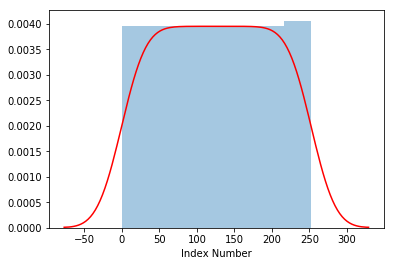

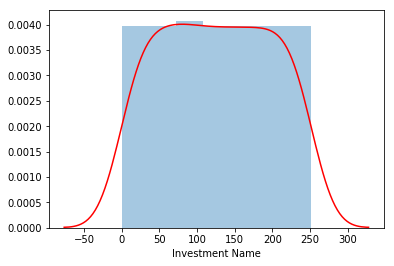

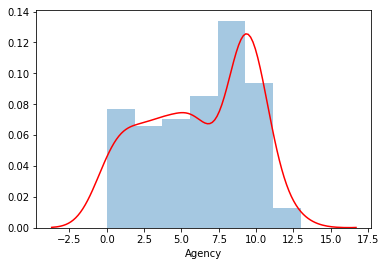

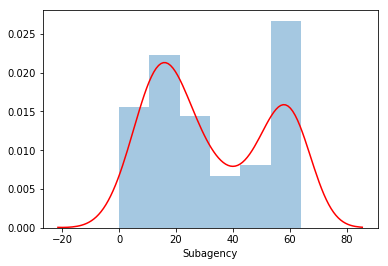

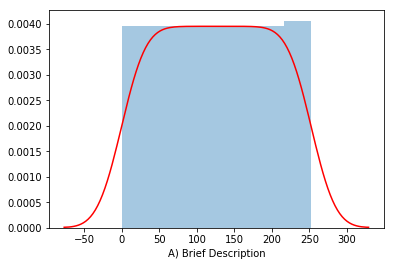

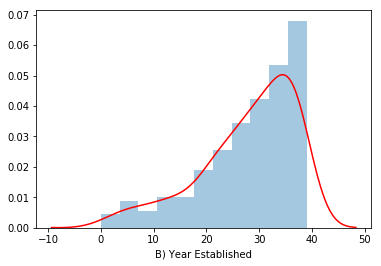

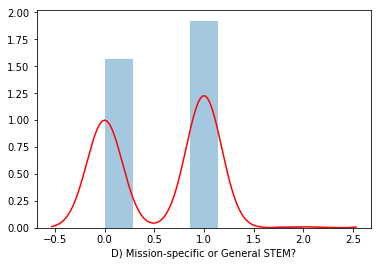

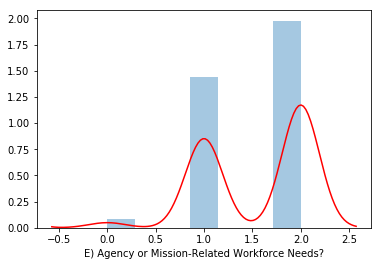

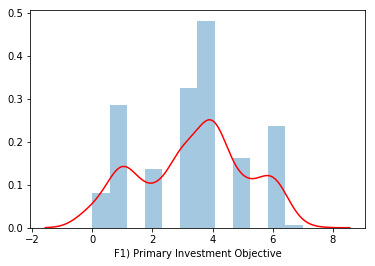

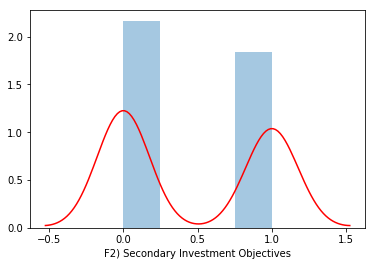

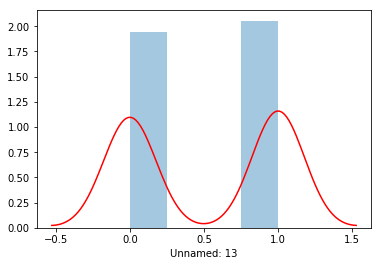

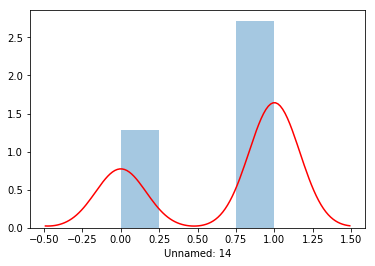

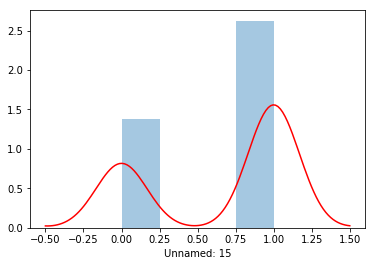

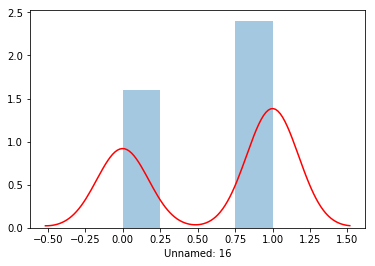

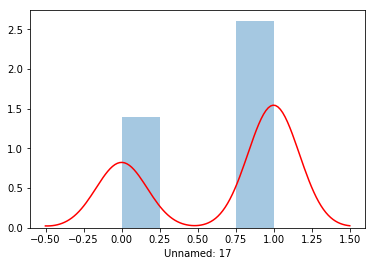

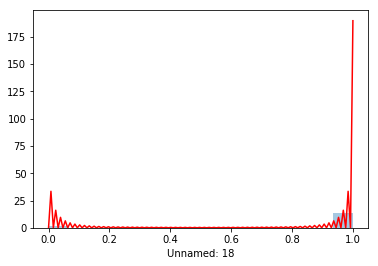

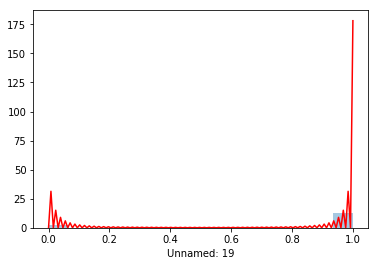

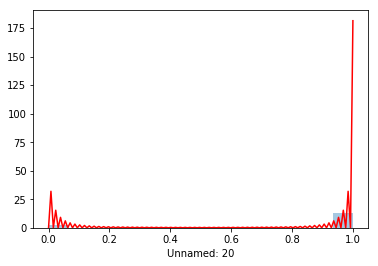

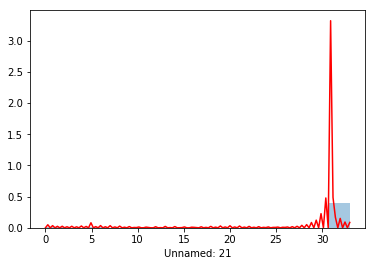

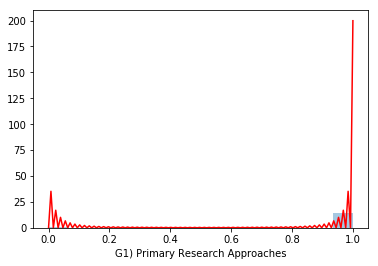

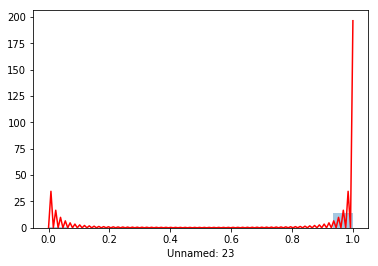

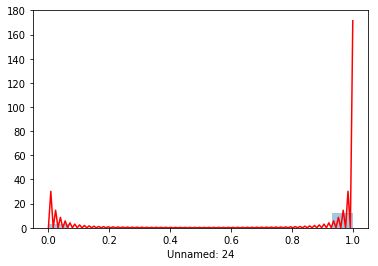

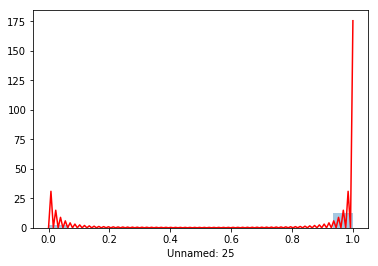

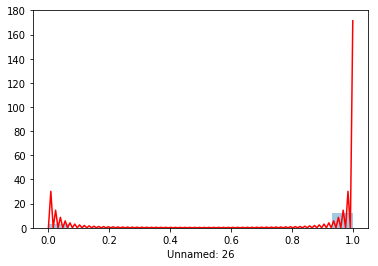

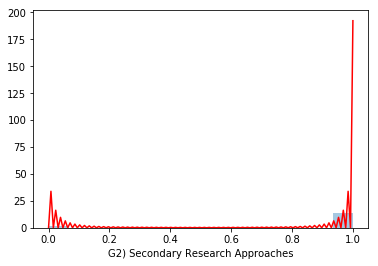

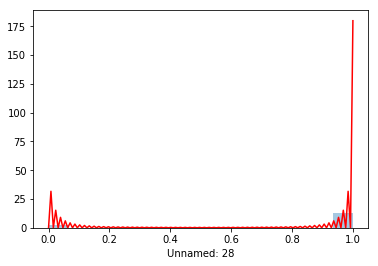

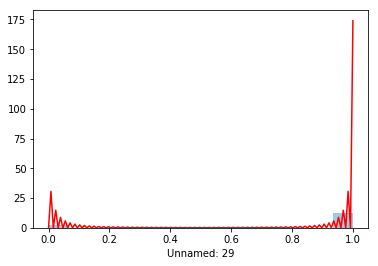

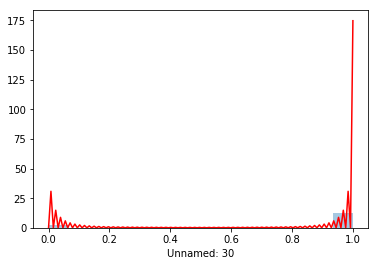

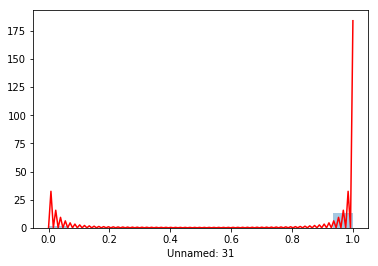

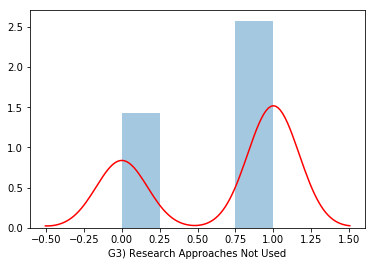

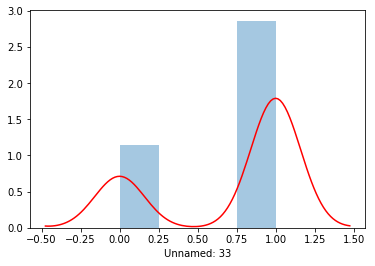

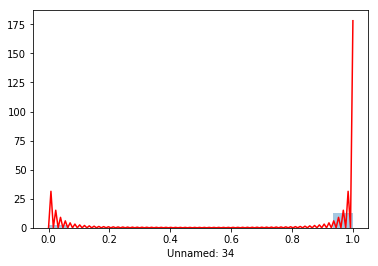

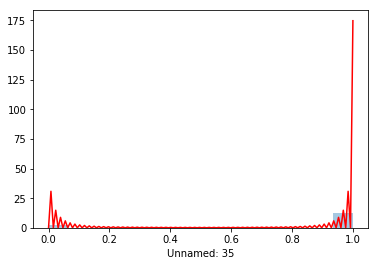

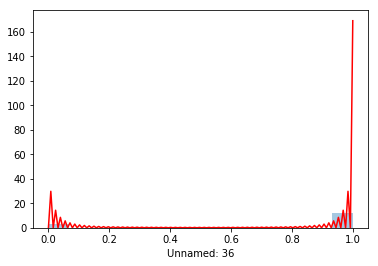

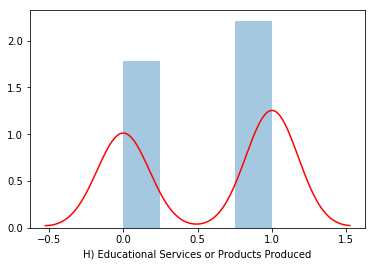

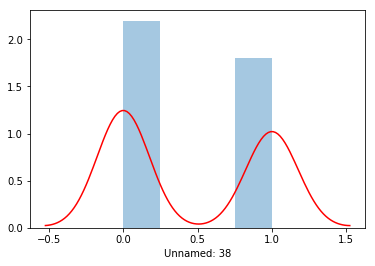

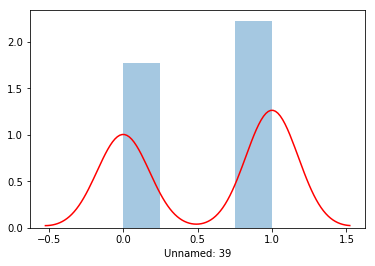

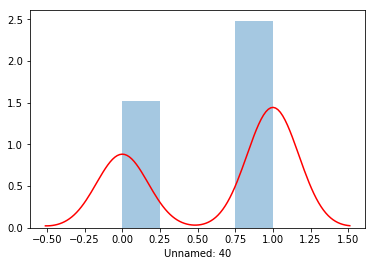

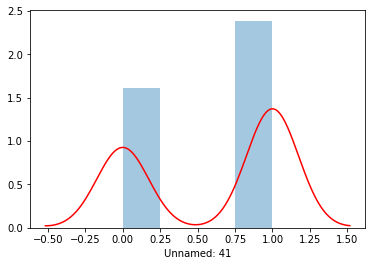

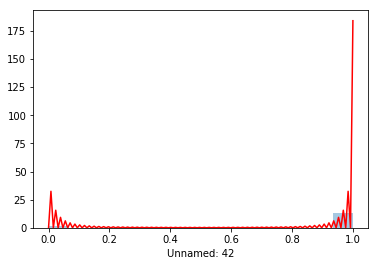

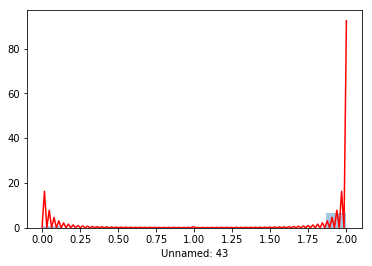

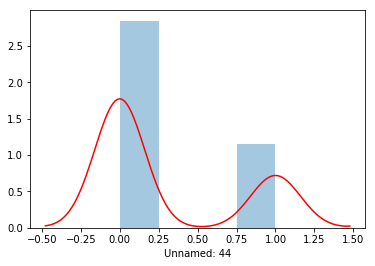

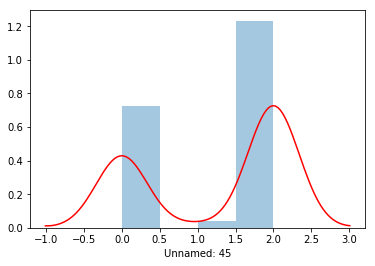

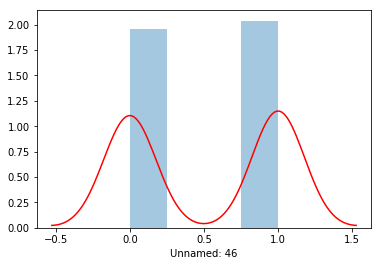

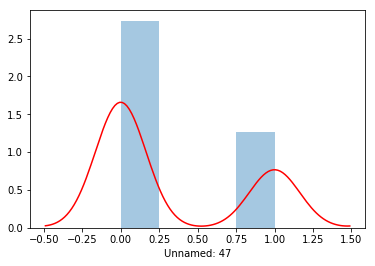

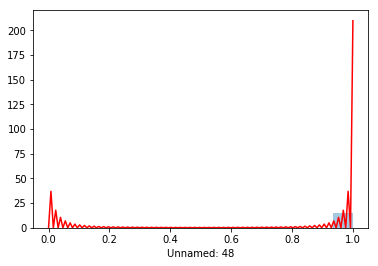

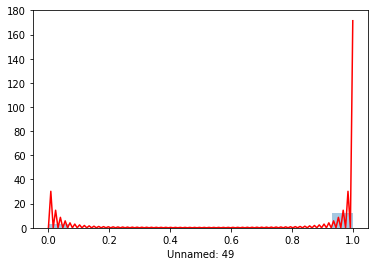

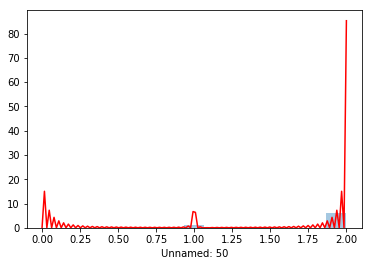

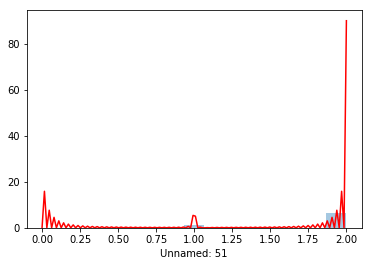

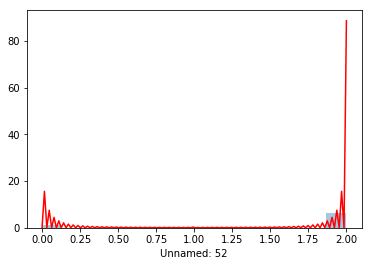

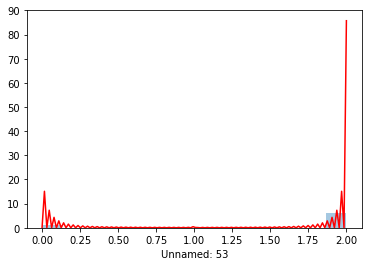

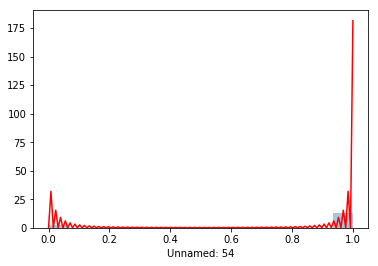

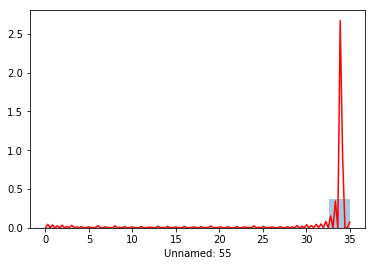

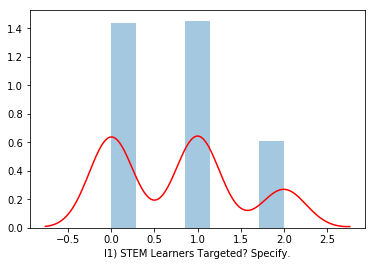

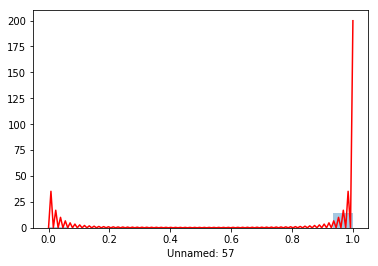

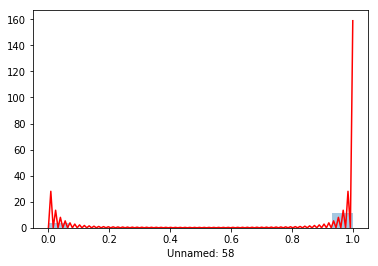

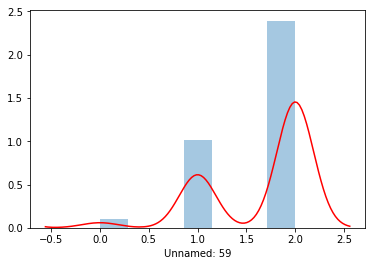

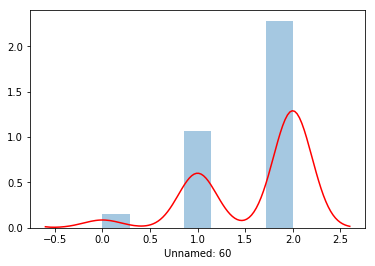

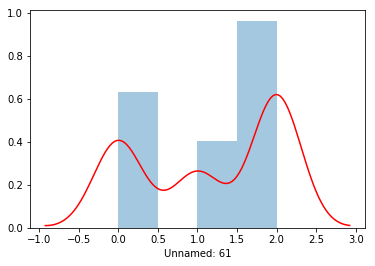

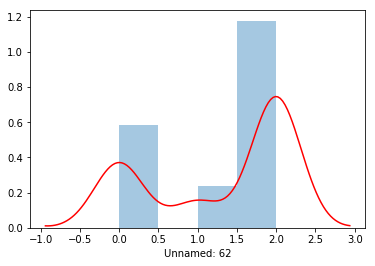

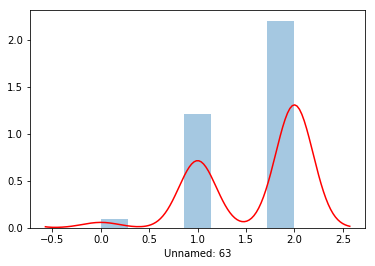

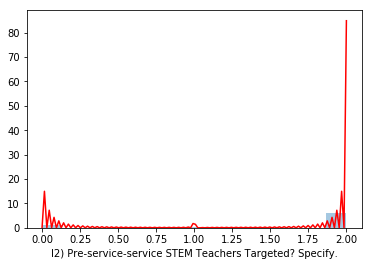

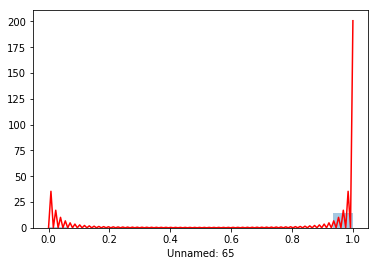

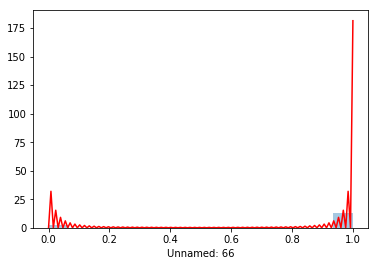

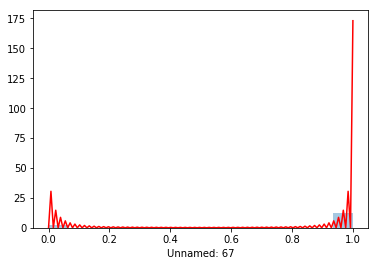

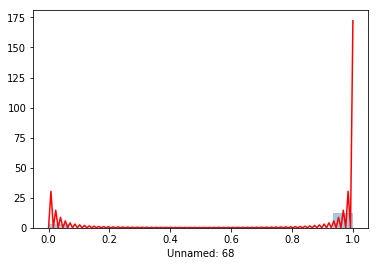

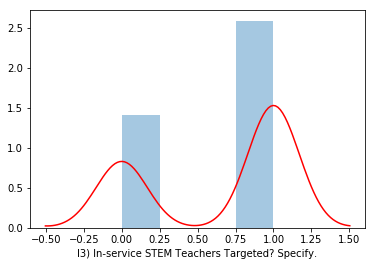

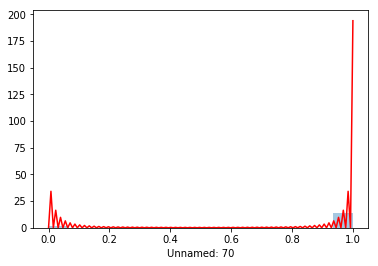

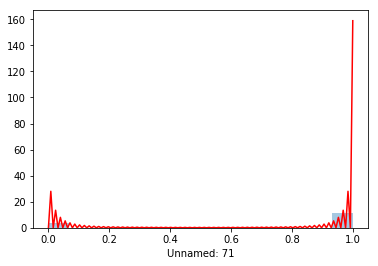

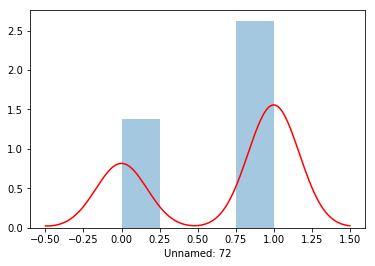

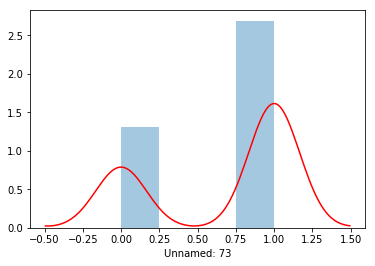

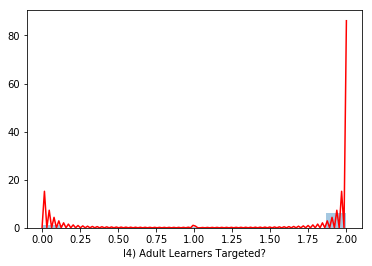

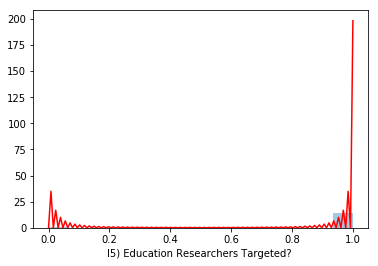

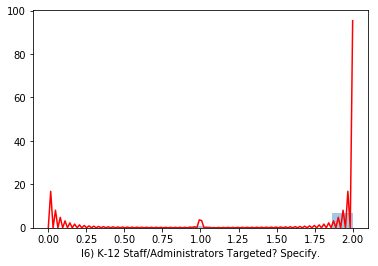

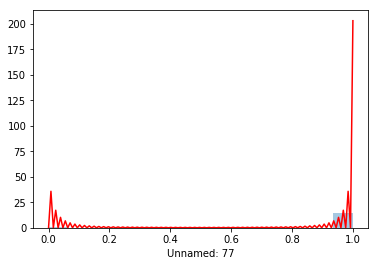

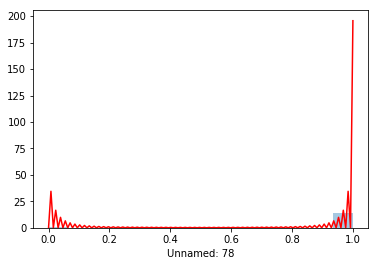

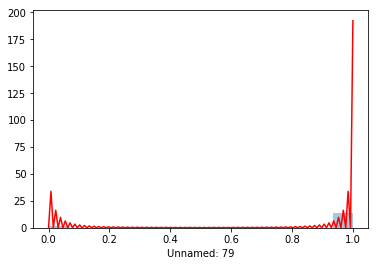

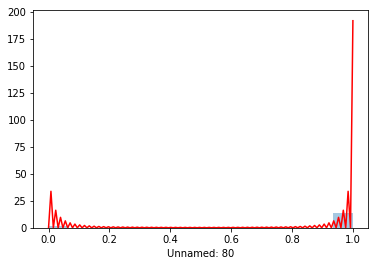

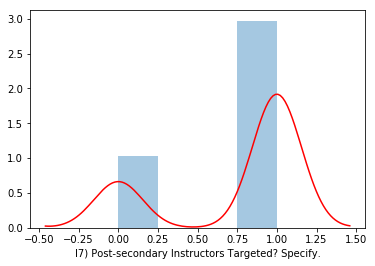

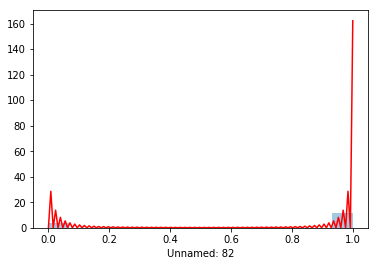

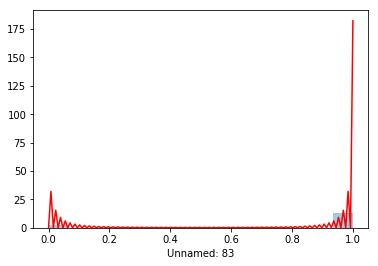

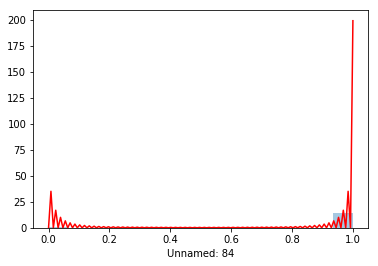

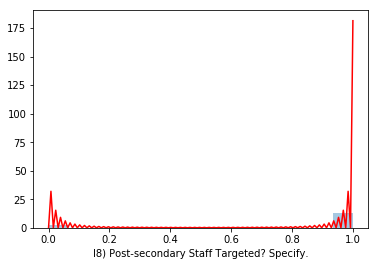

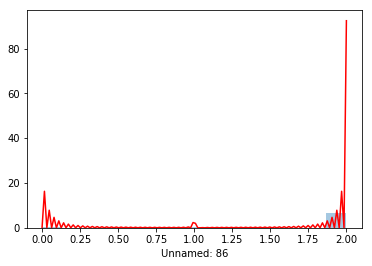

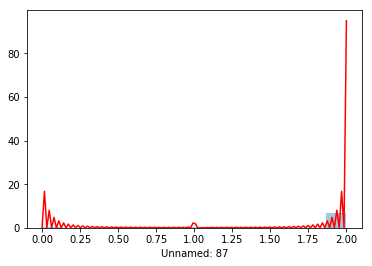

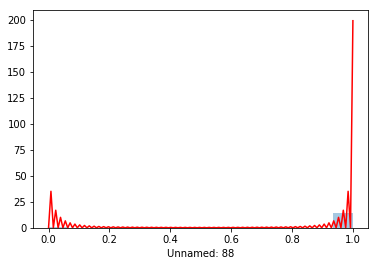

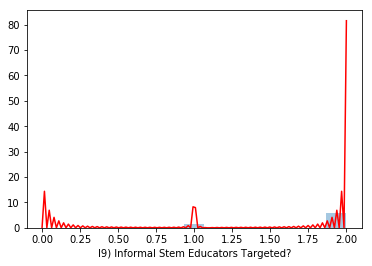

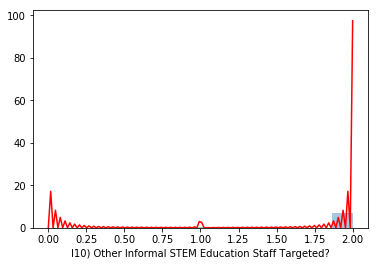

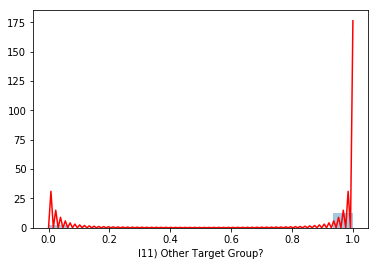

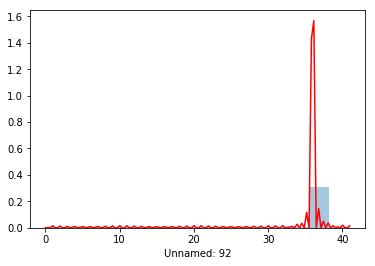

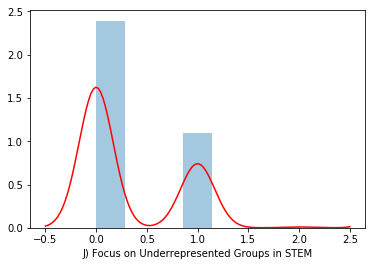

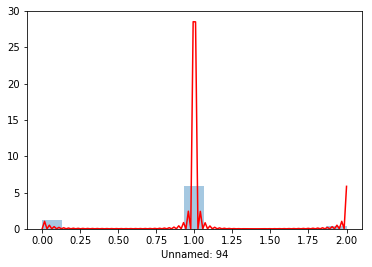

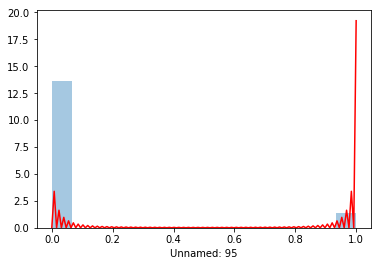

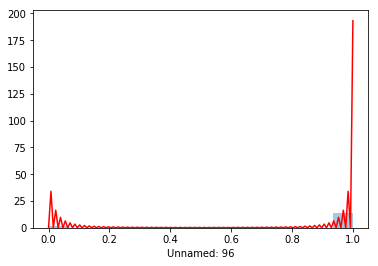

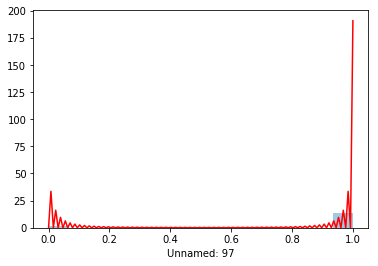

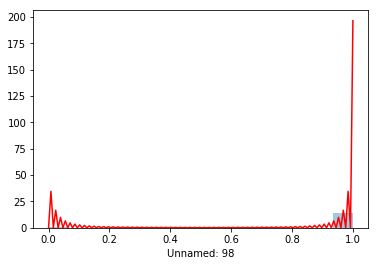

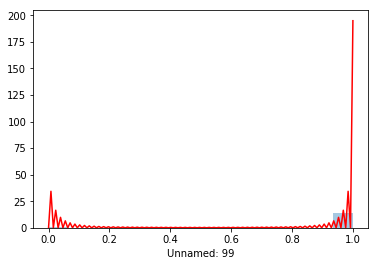

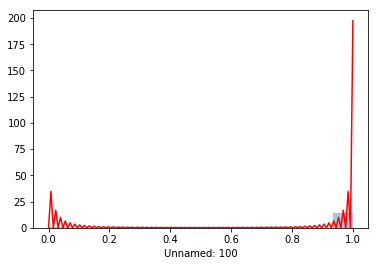

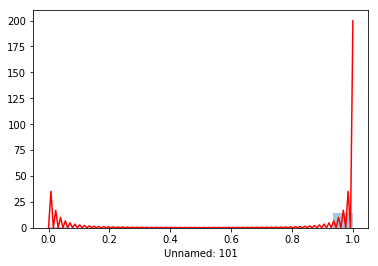

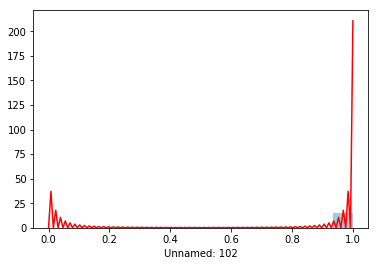

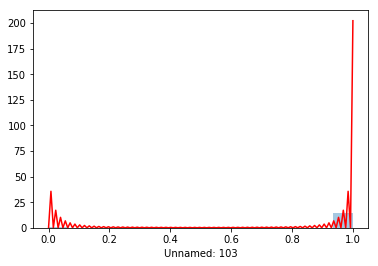

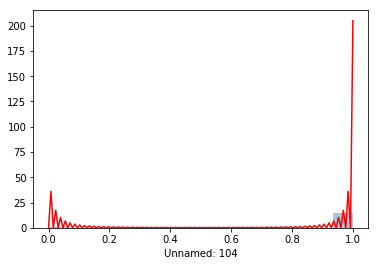

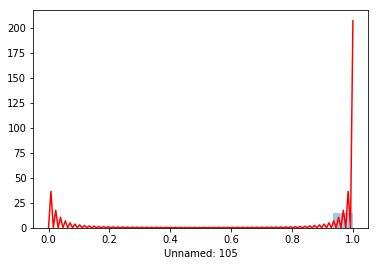

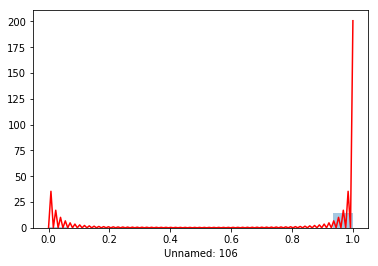

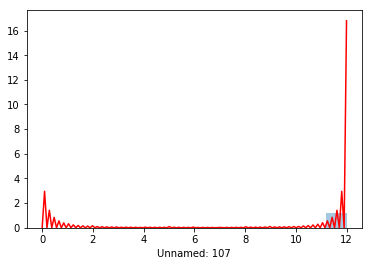

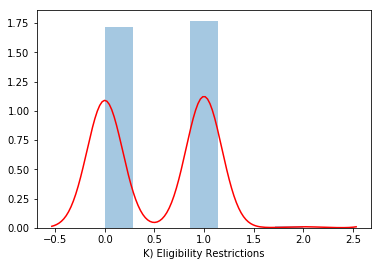

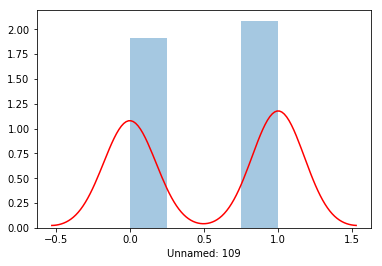

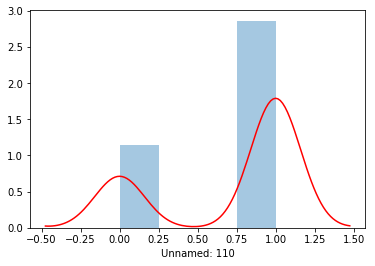

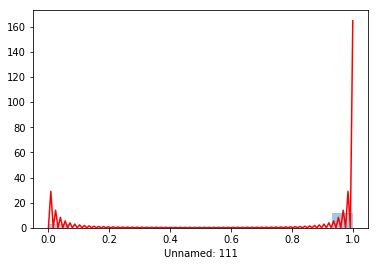

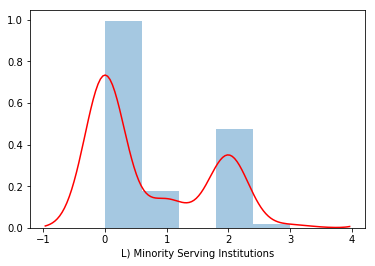

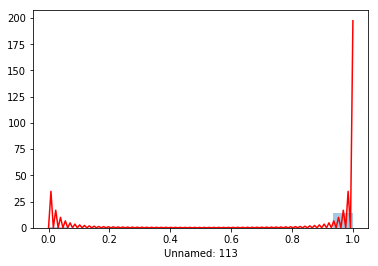

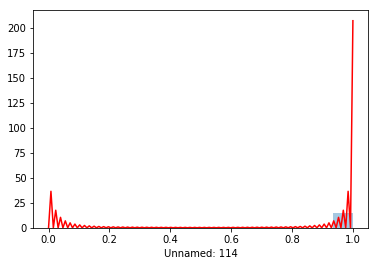

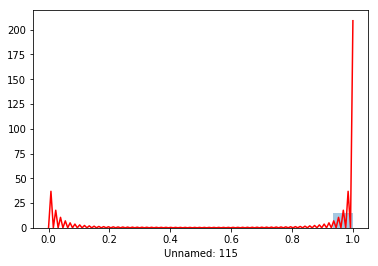

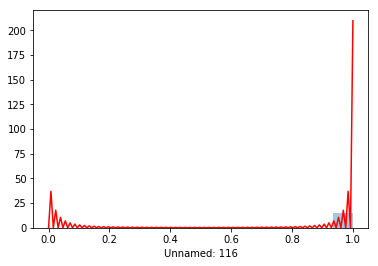

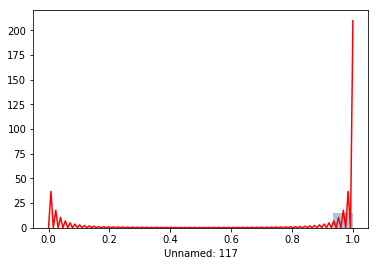

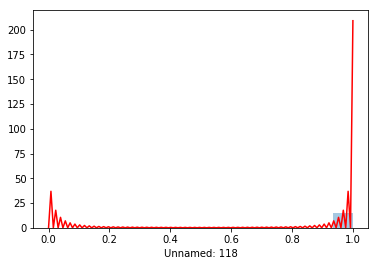

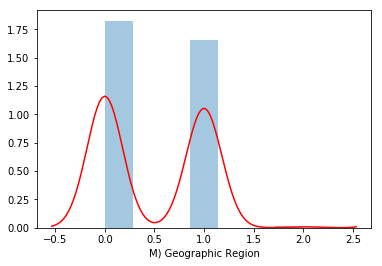

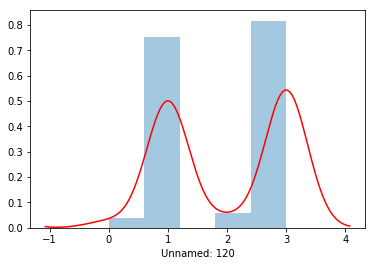

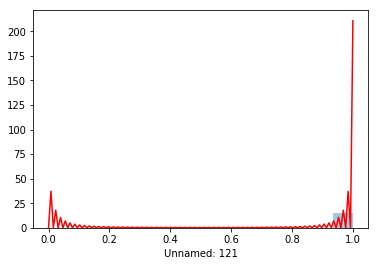

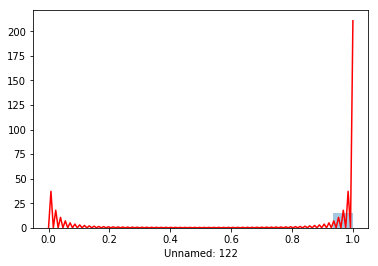

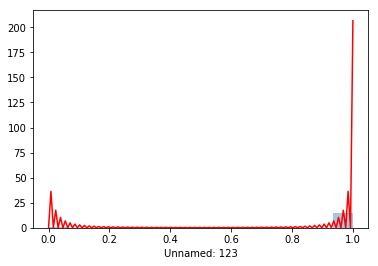

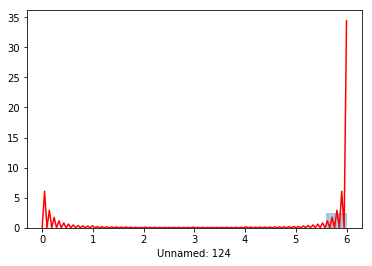

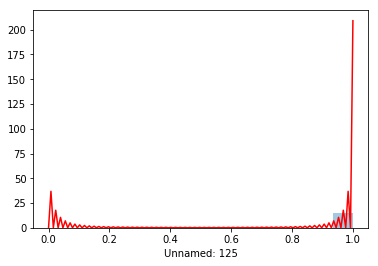

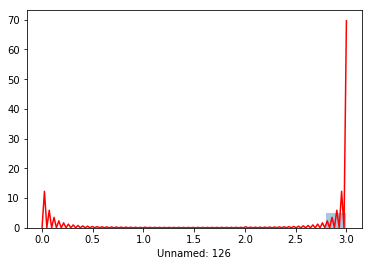

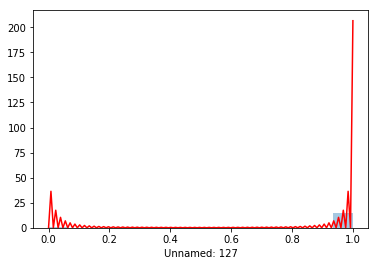

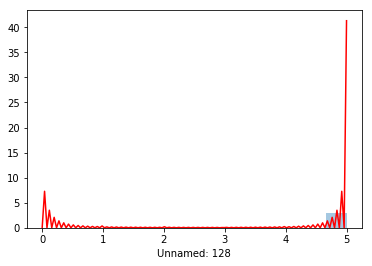

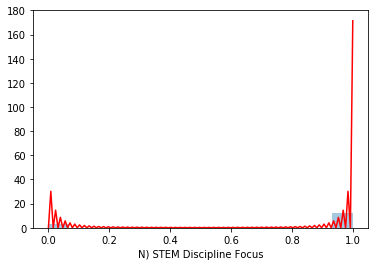

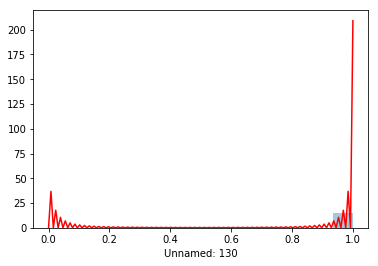

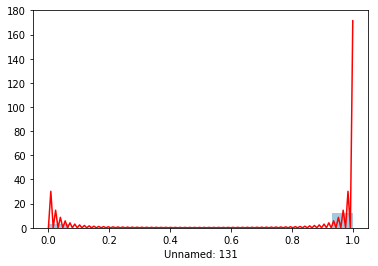

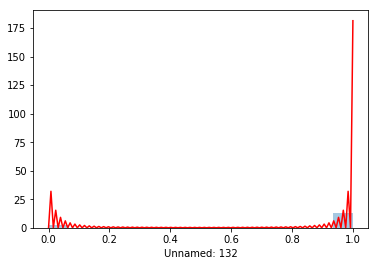

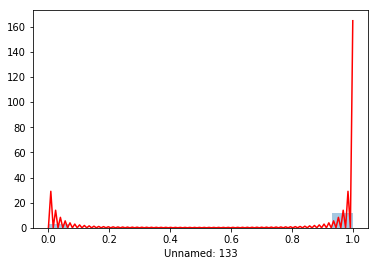

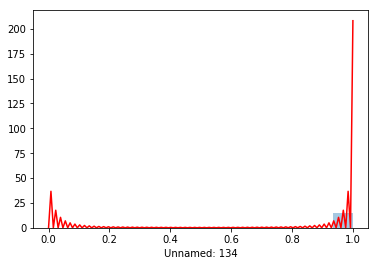

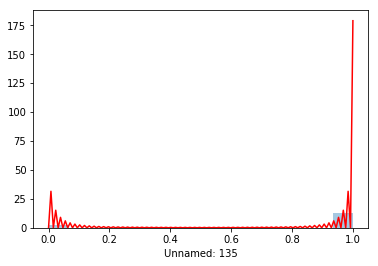

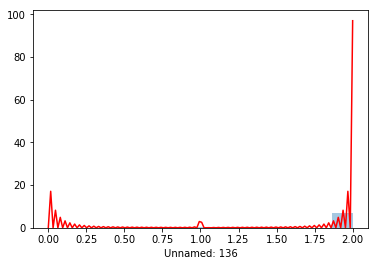

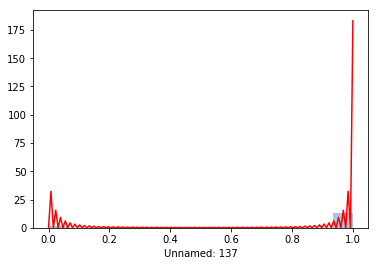

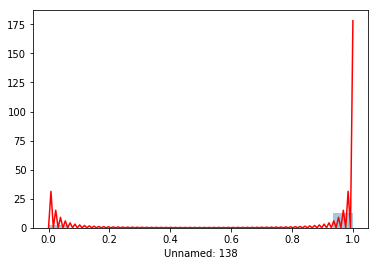

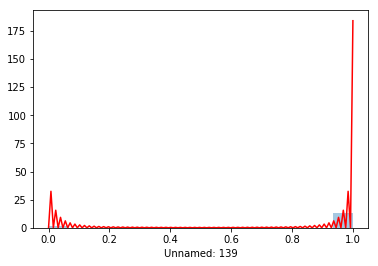

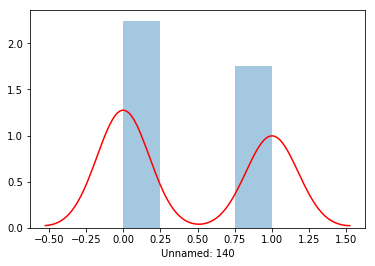

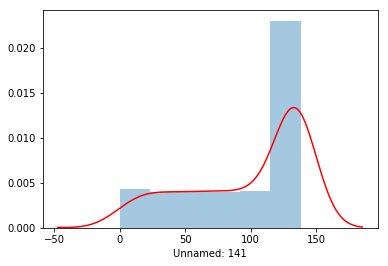

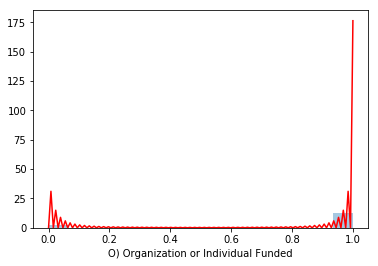

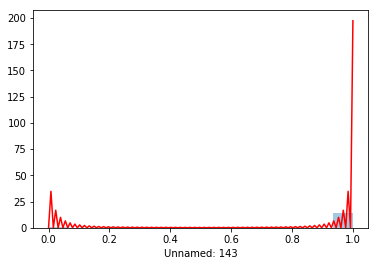

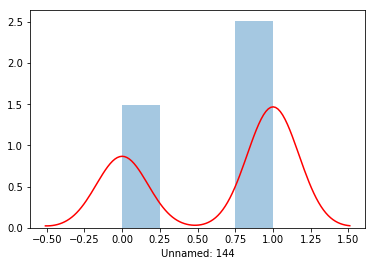

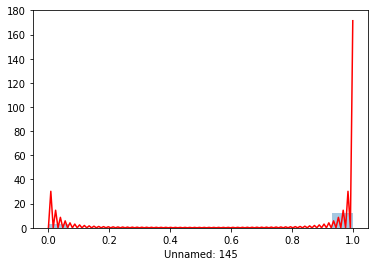

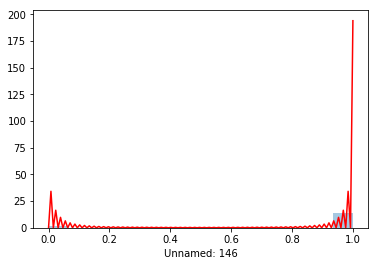

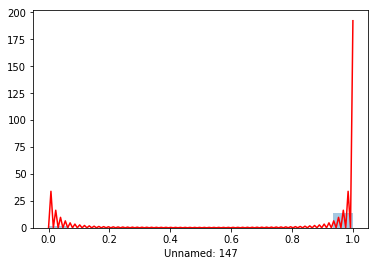

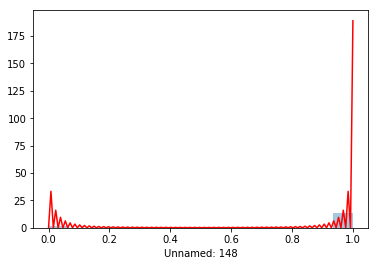

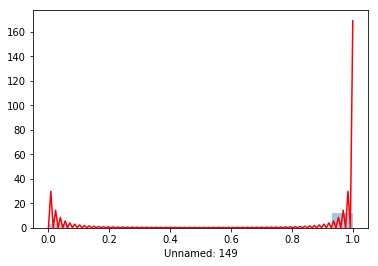

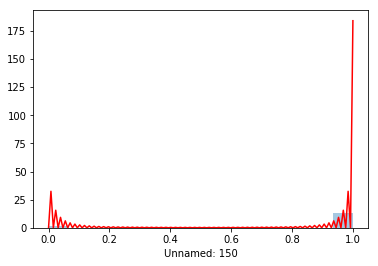

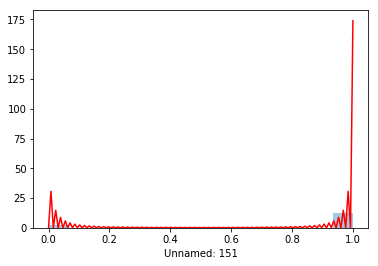

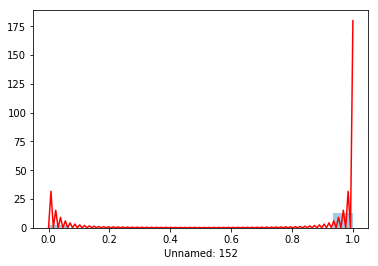

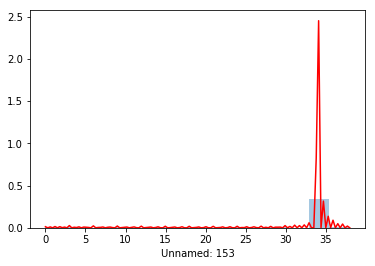

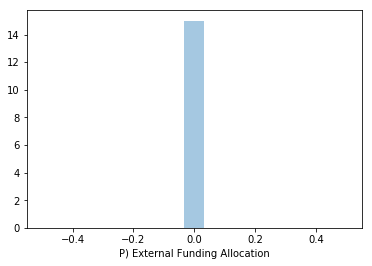

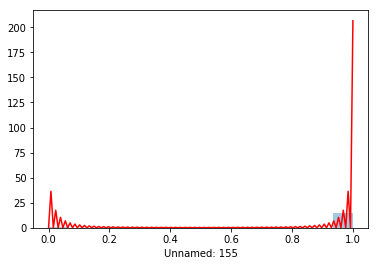

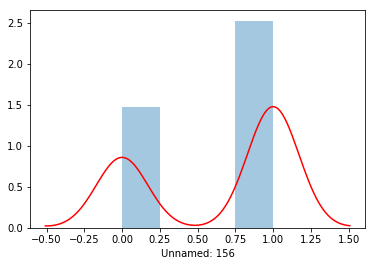

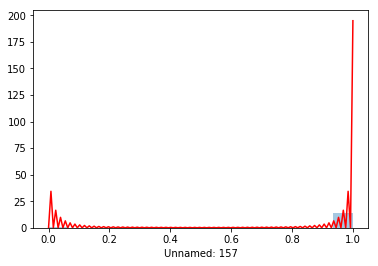

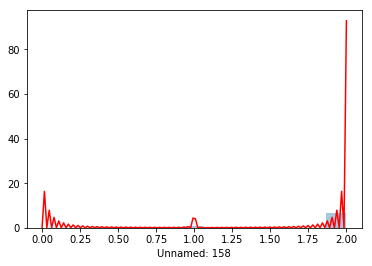

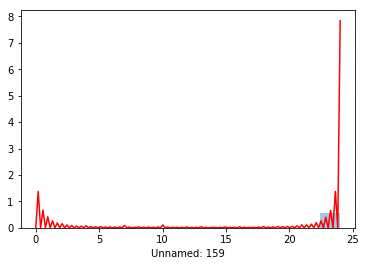

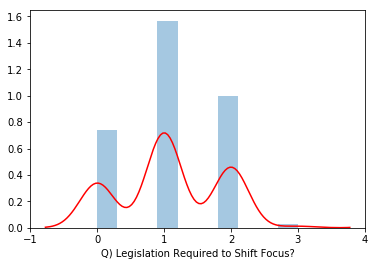

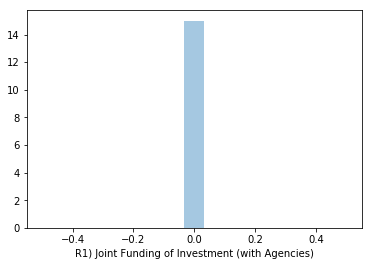

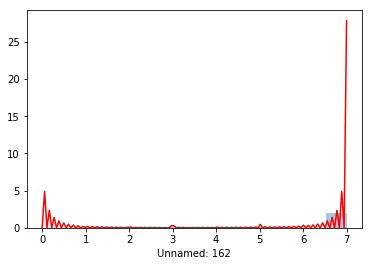

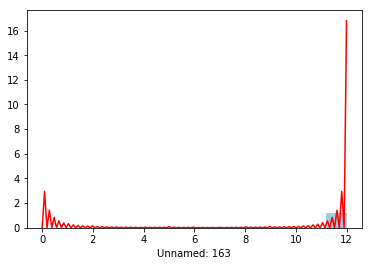

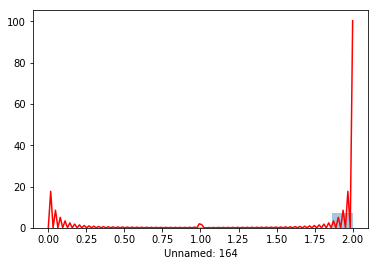

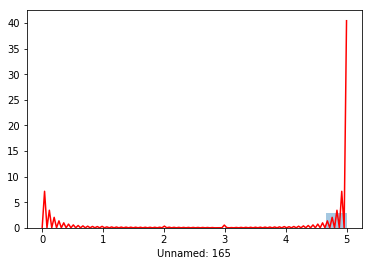

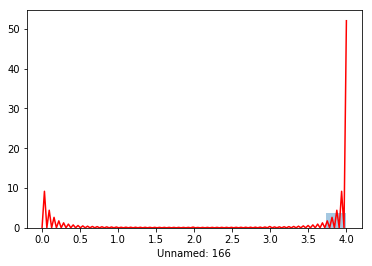

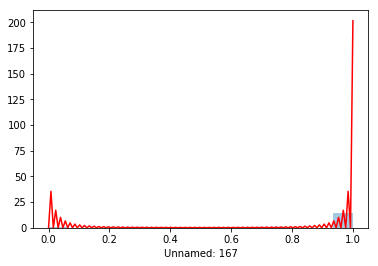

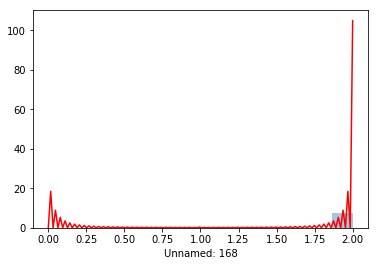

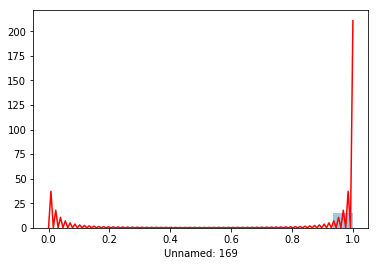

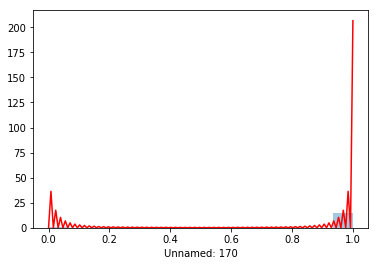

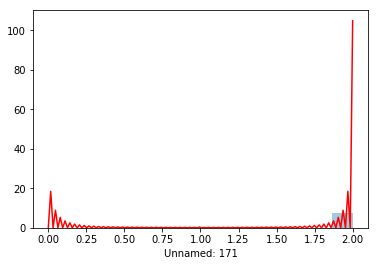

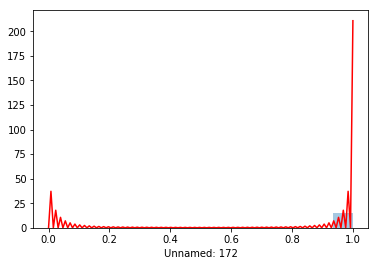

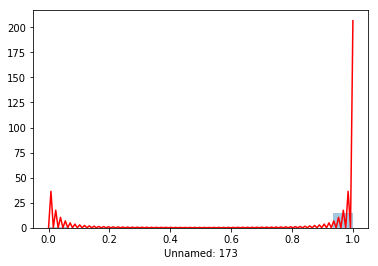

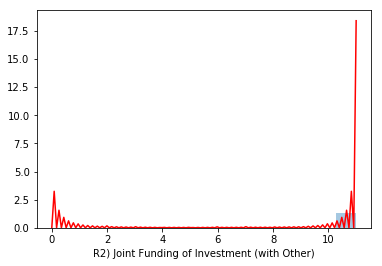

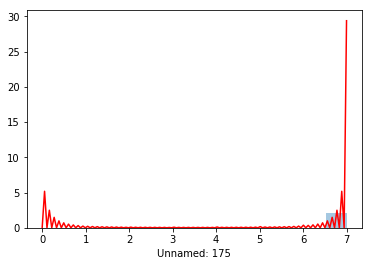

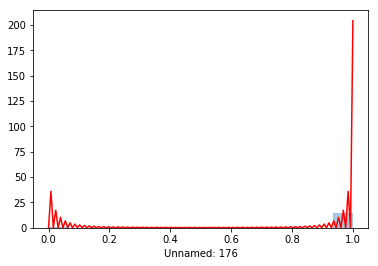

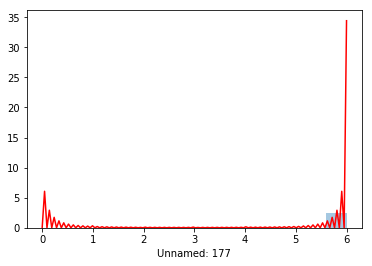

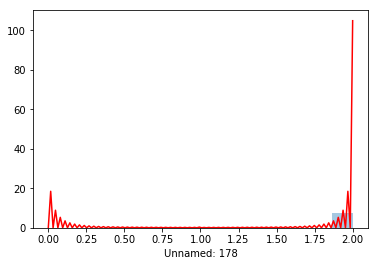

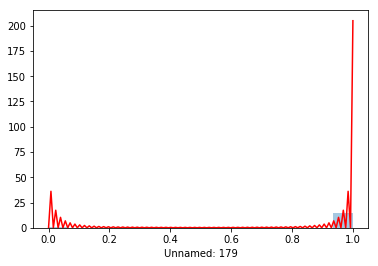

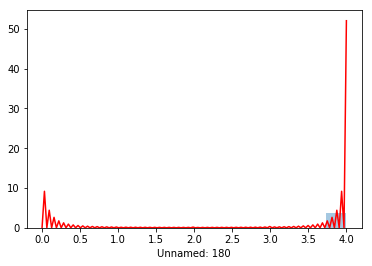

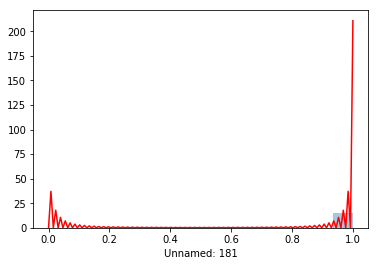

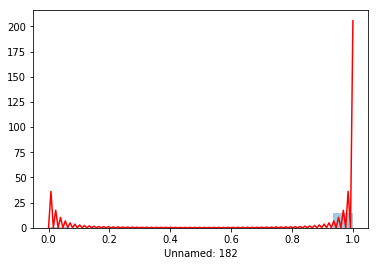

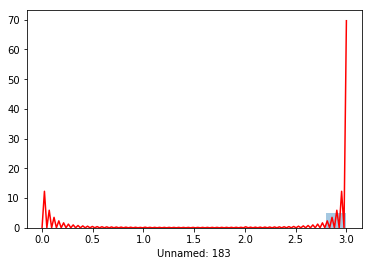

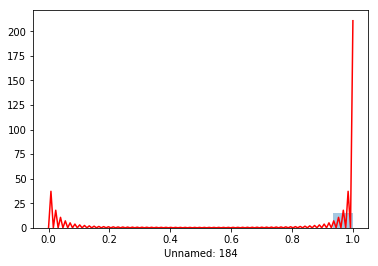

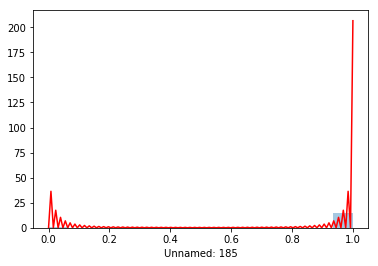

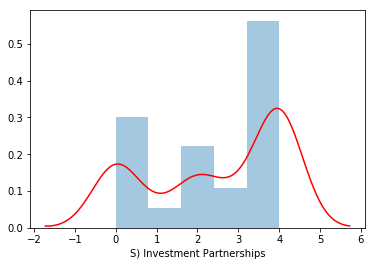

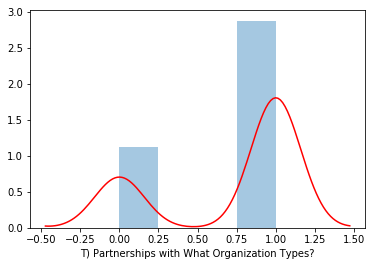

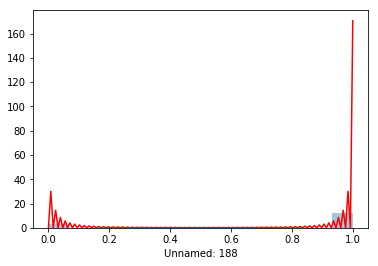

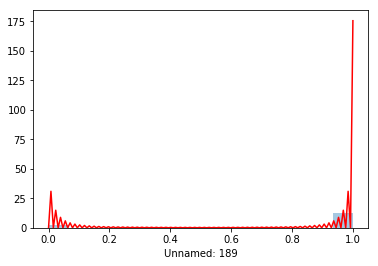

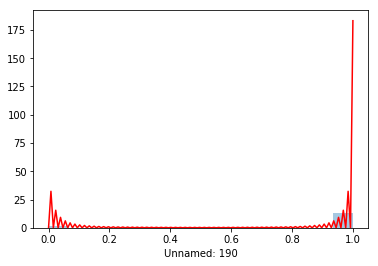

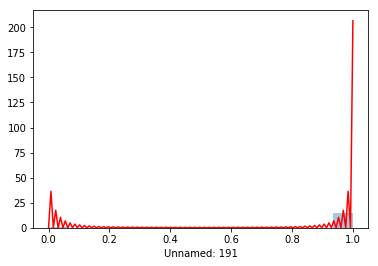

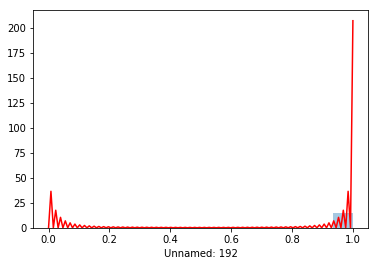

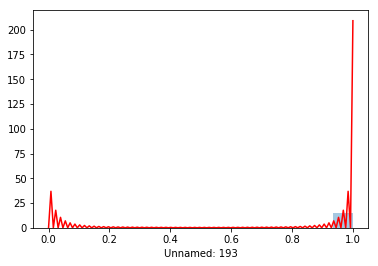

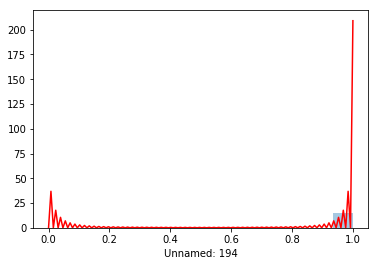

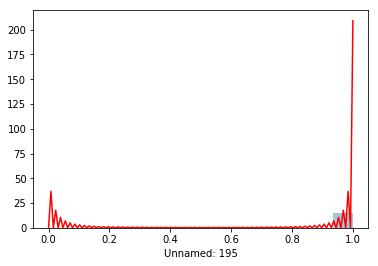

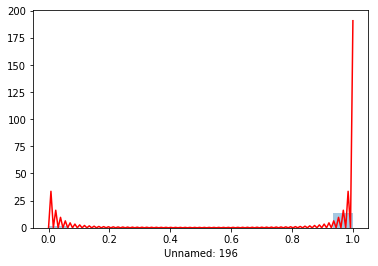

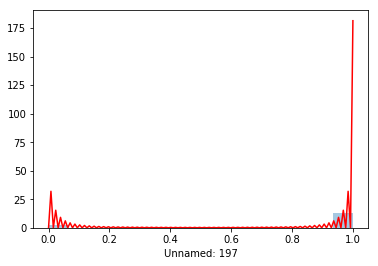

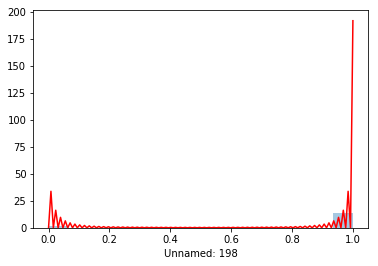

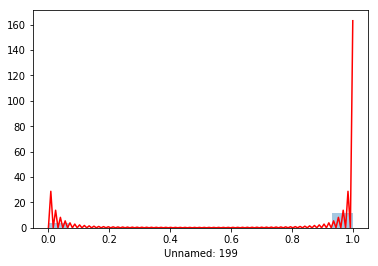

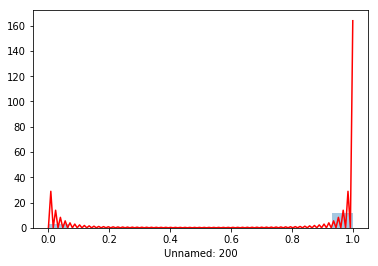

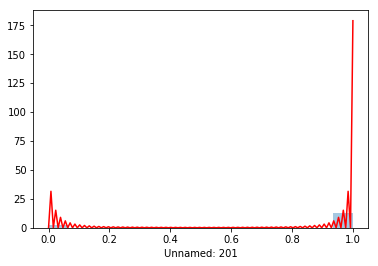

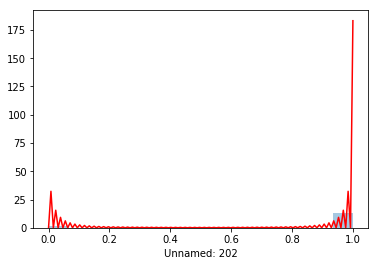

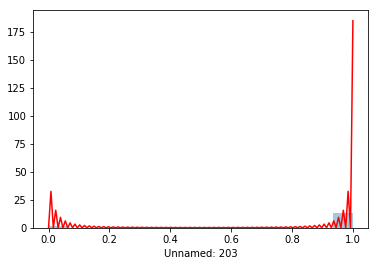

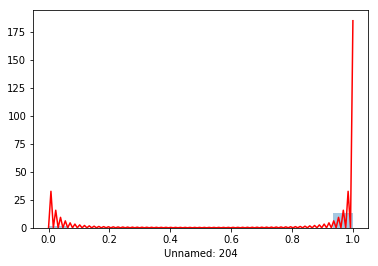

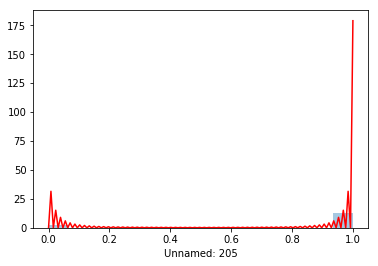

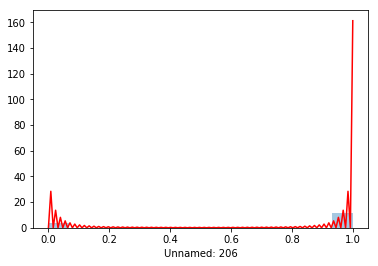

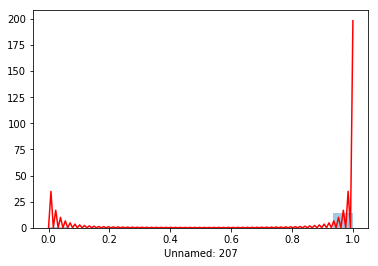

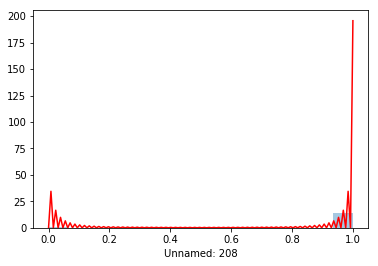

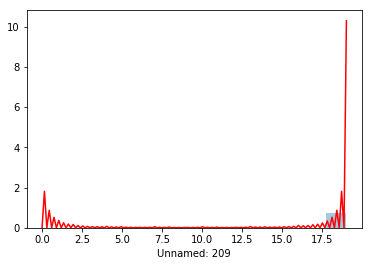

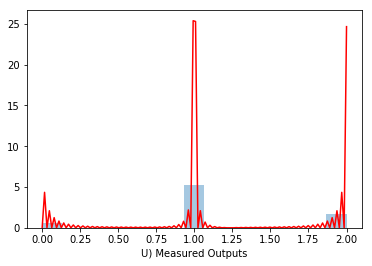

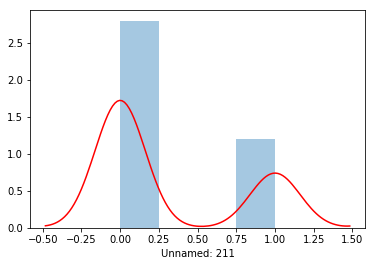

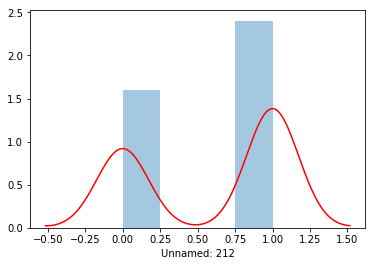

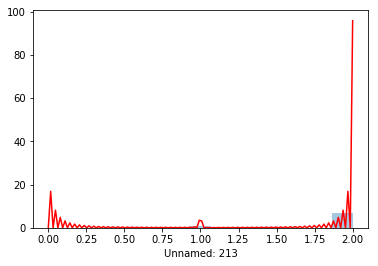

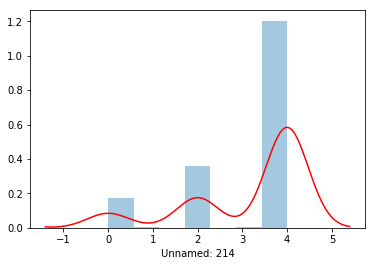

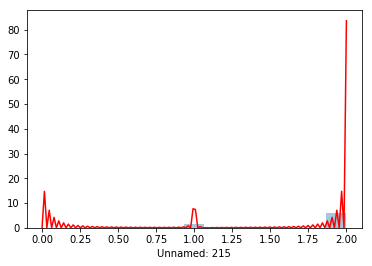

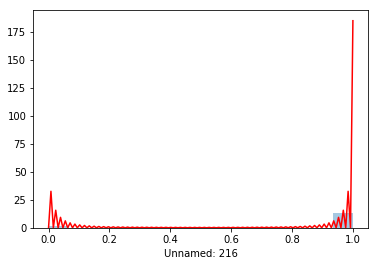

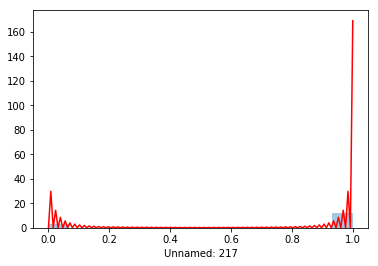

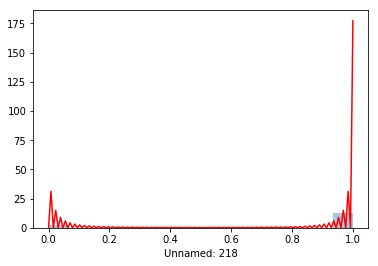

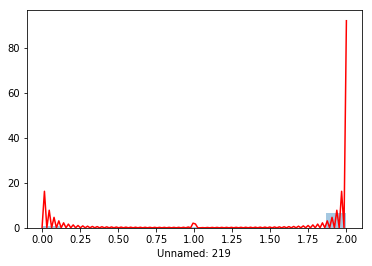

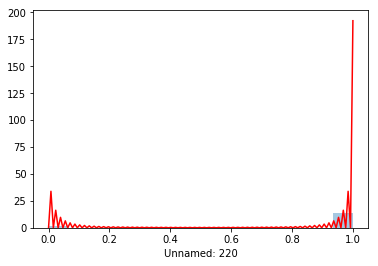

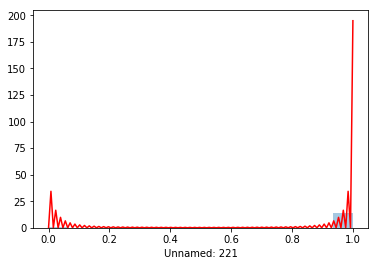

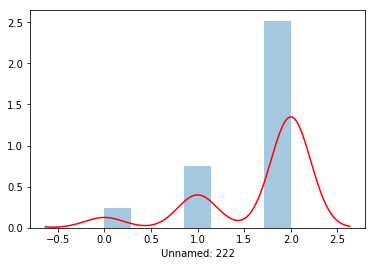

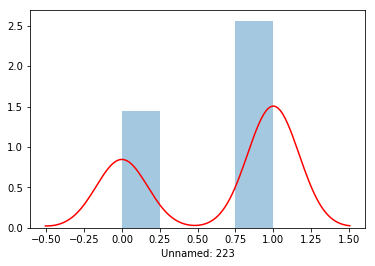

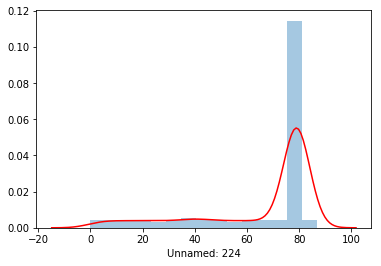

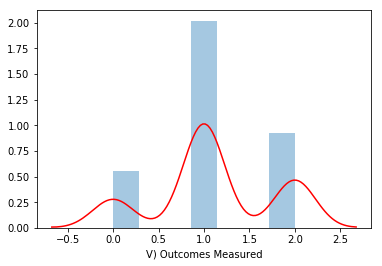

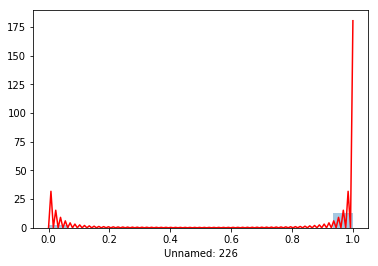

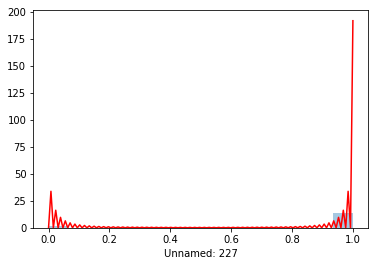

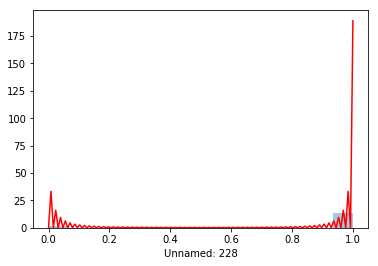

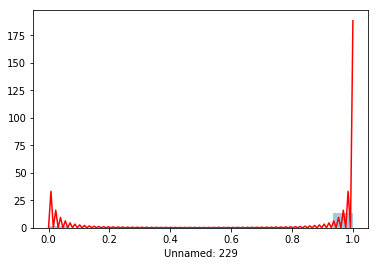

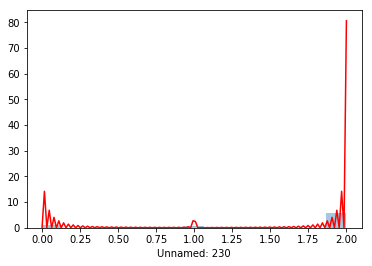

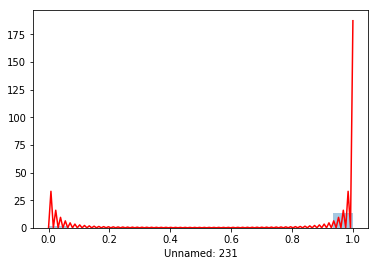

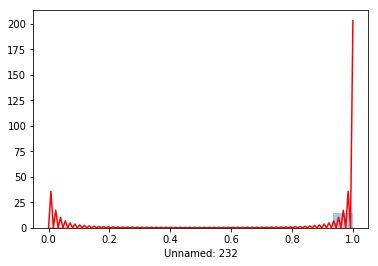

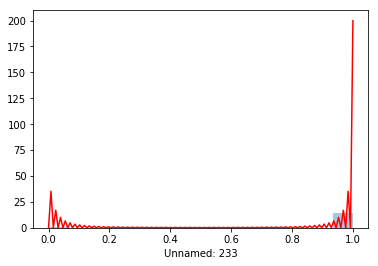

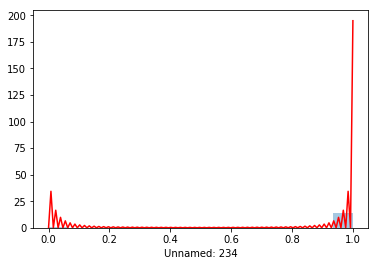

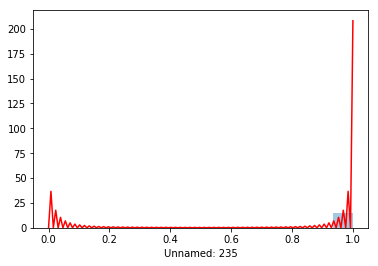

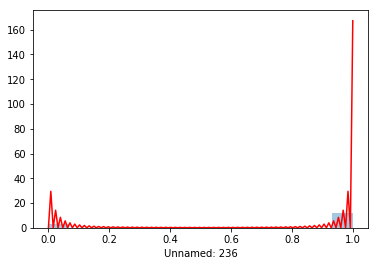

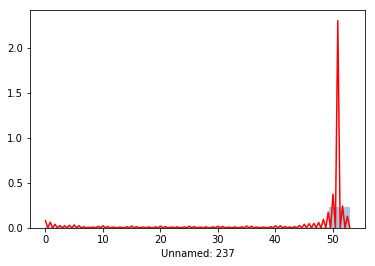

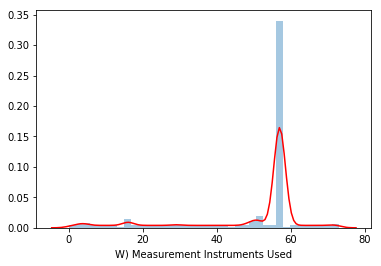

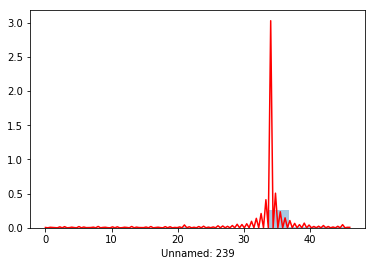

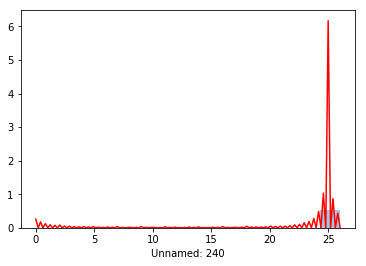

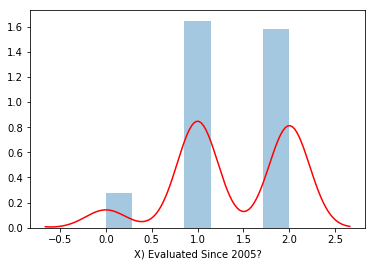

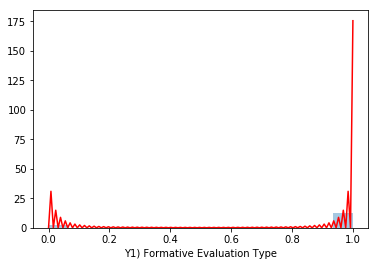

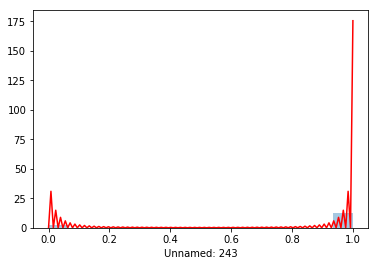

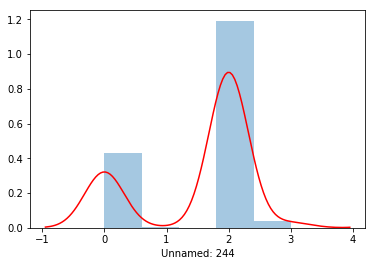

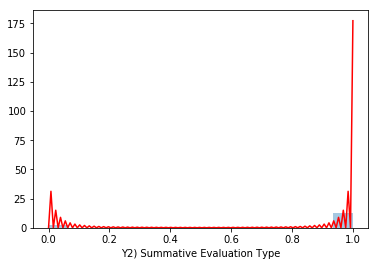

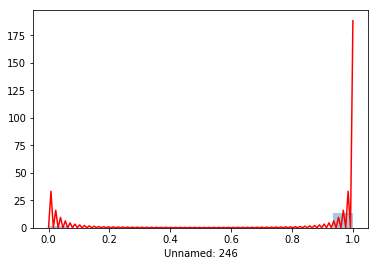

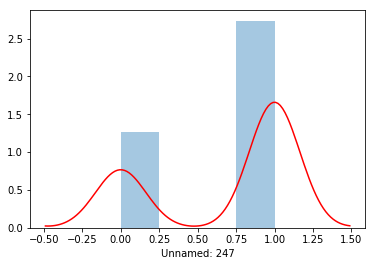

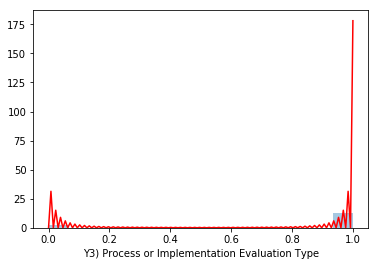

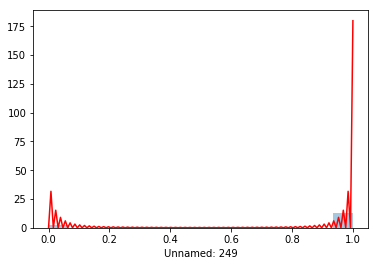

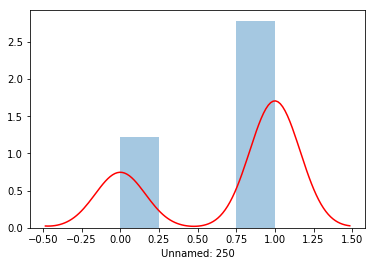

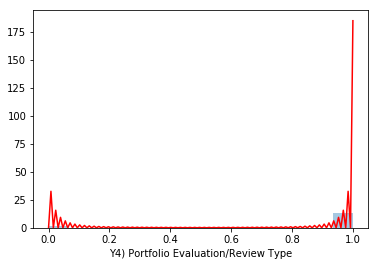

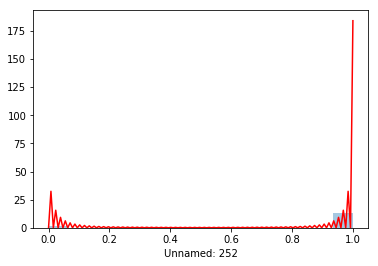

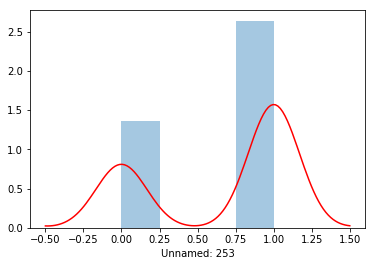

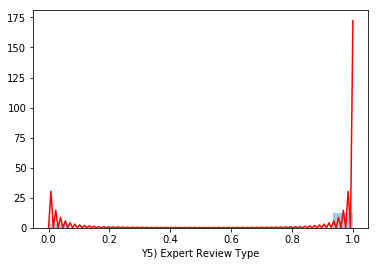

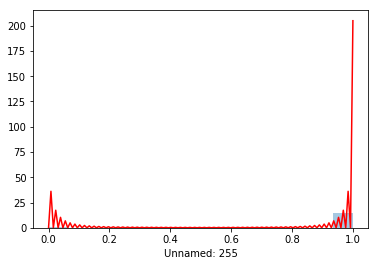

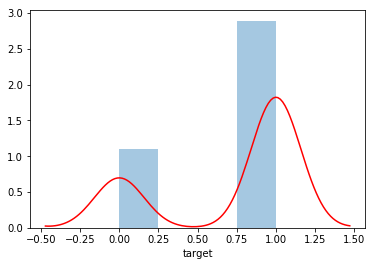

In [73]:
##### plots for non-processed data
show_uni_plots(funding_var,df,processed=0)

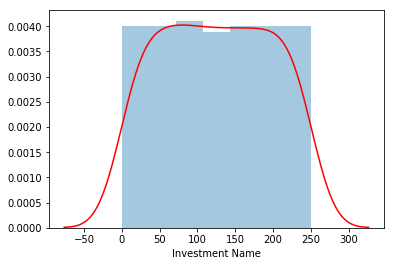

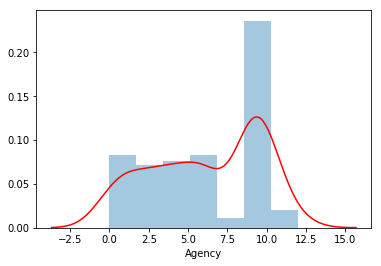

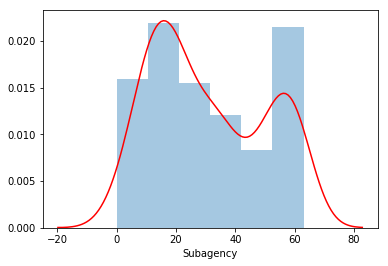

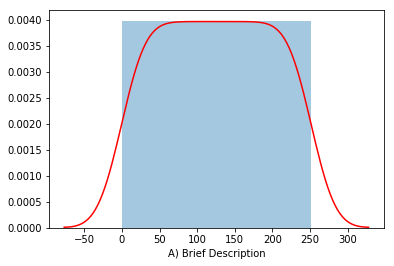

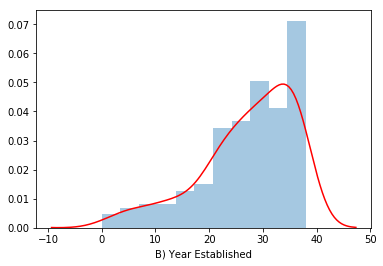

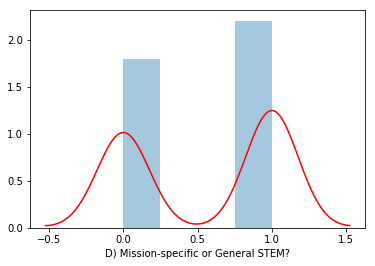

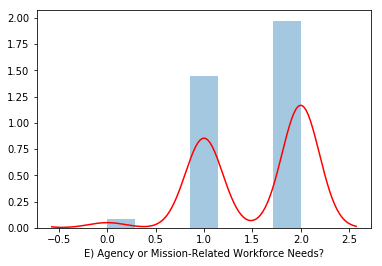

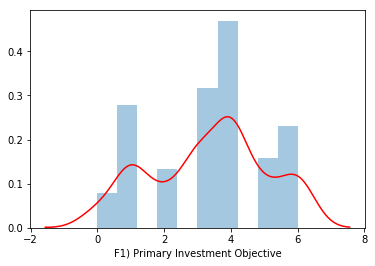

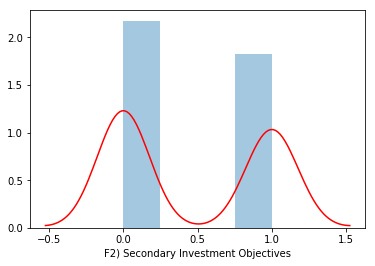

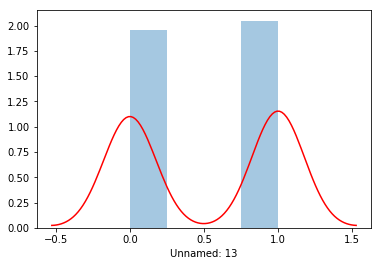

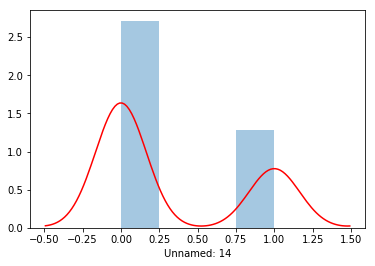

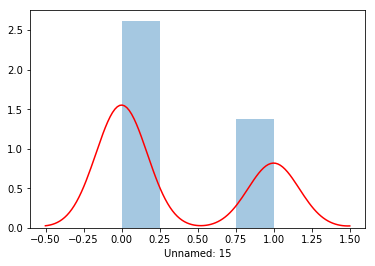

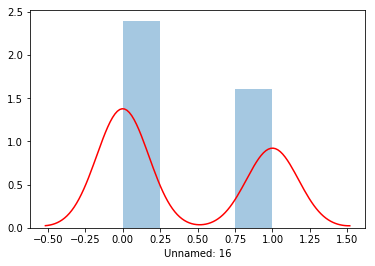

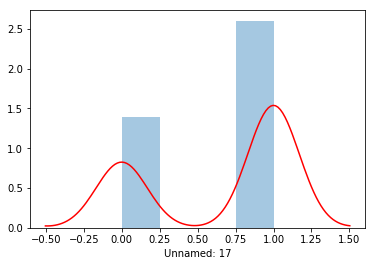

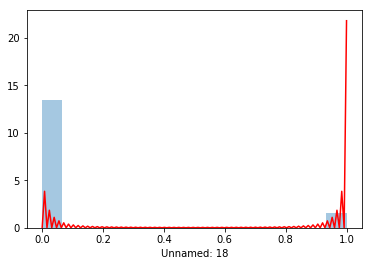

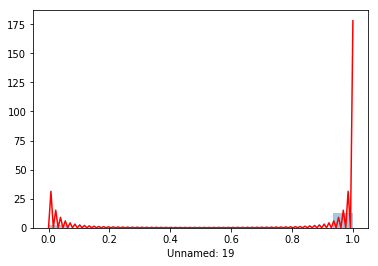

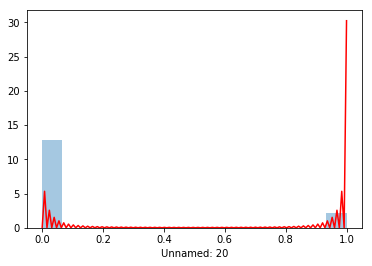

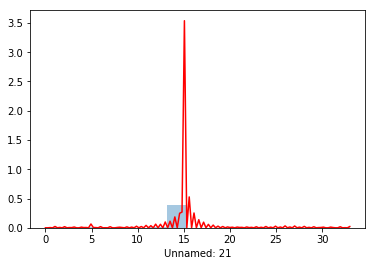

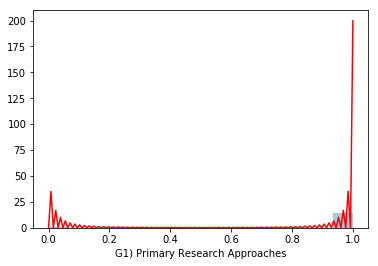

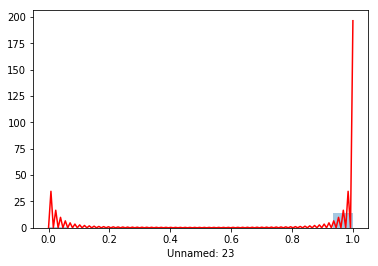

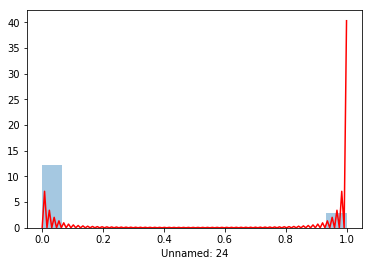

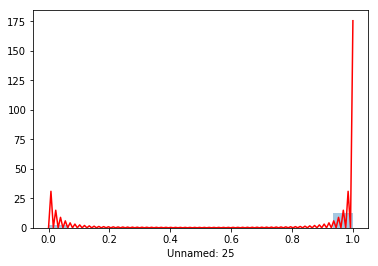

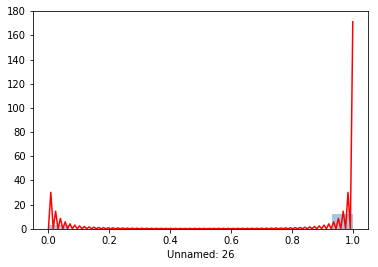

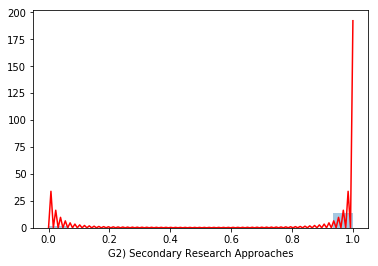

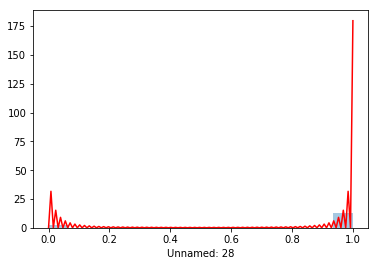

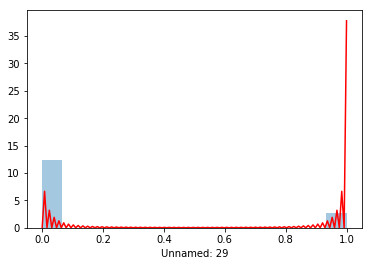

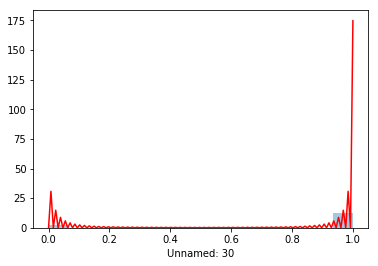

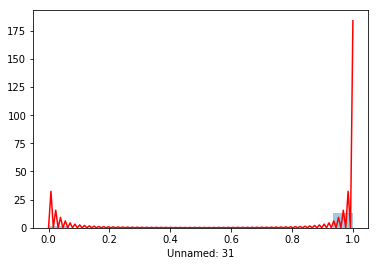

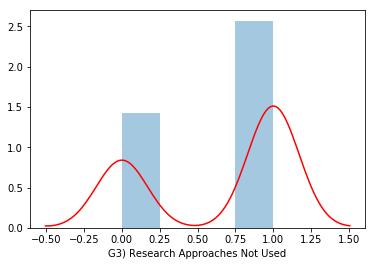

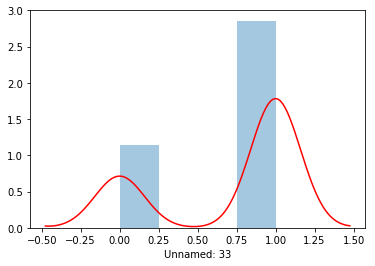

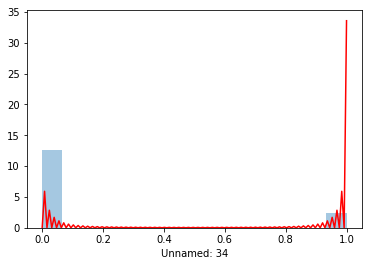

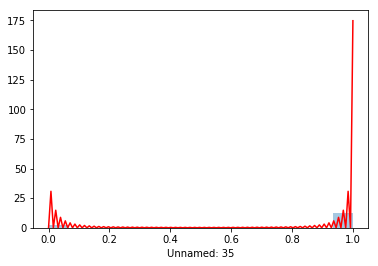

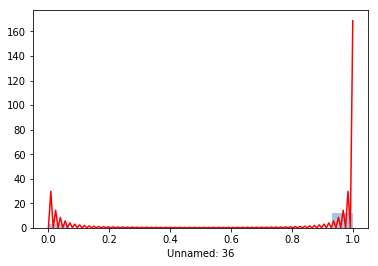

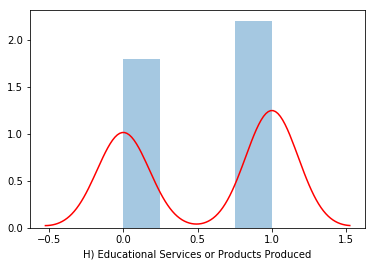

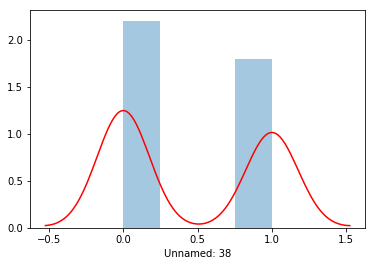

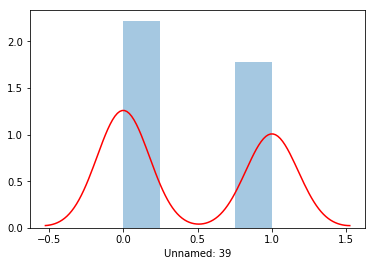

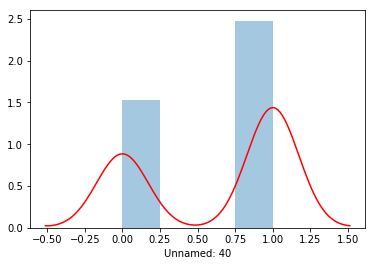

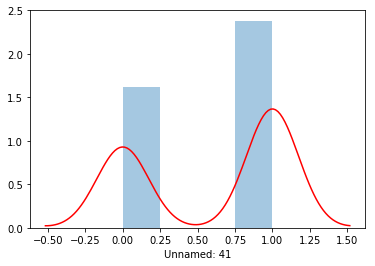

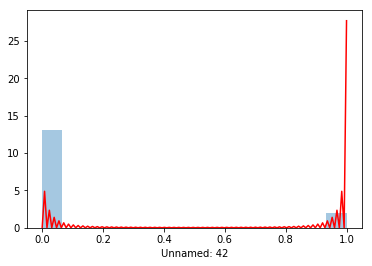

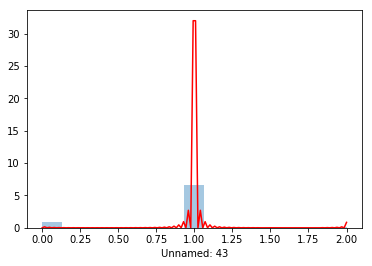

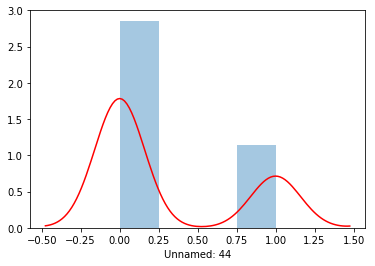

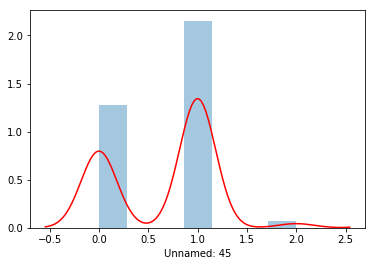

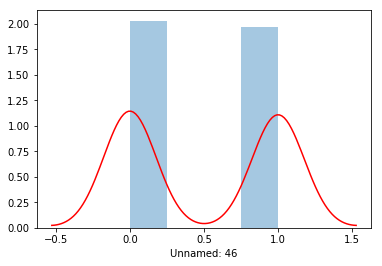

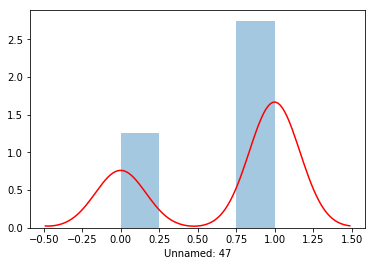

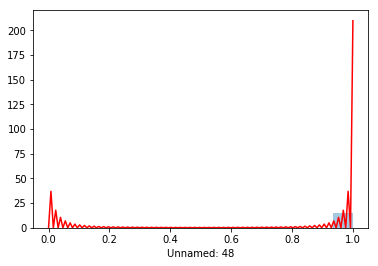

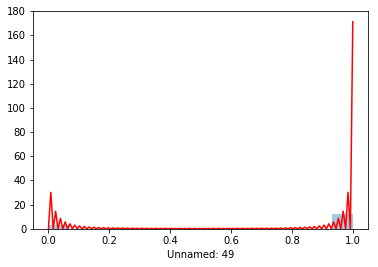

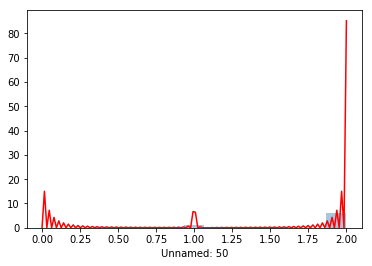

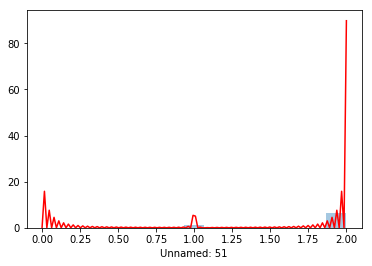

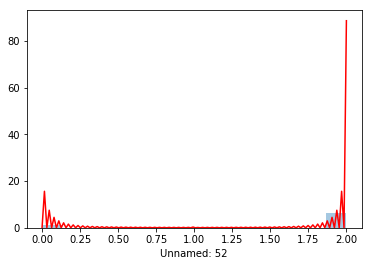

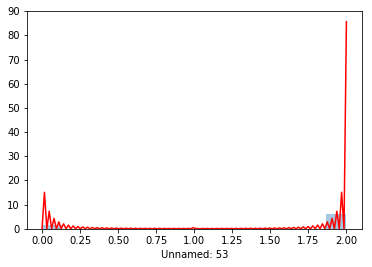

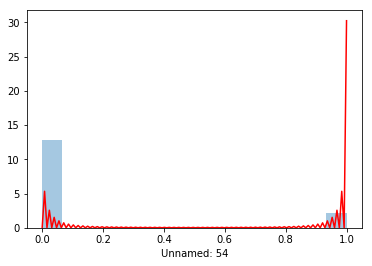

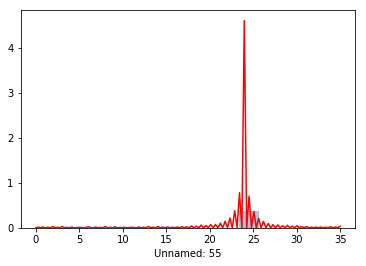

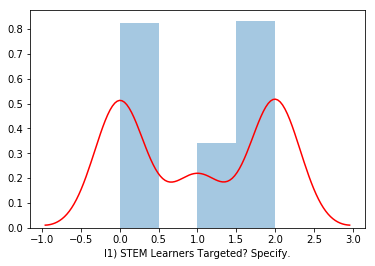

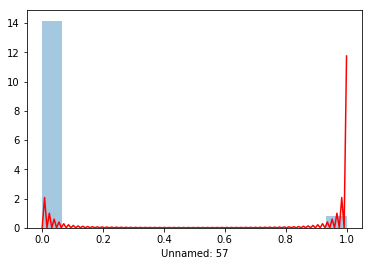

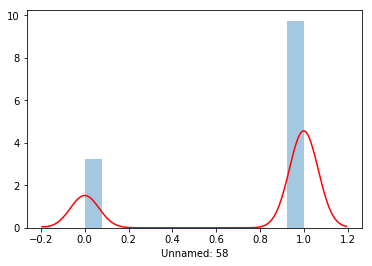

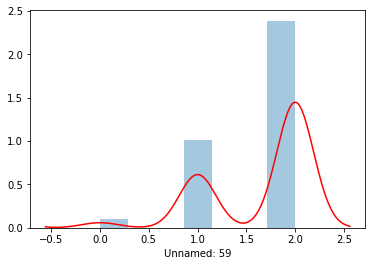

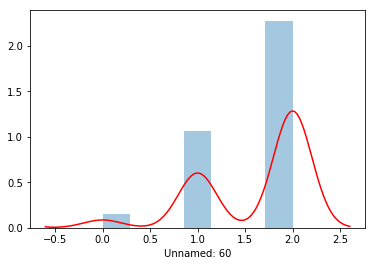

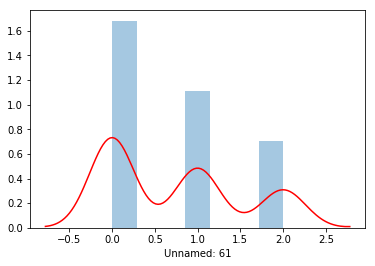

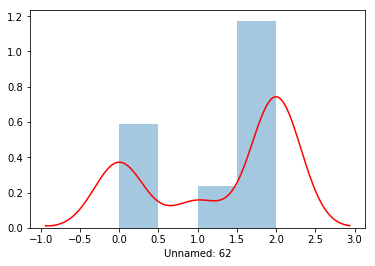

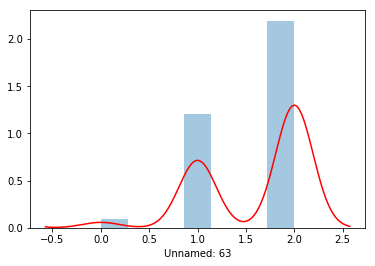

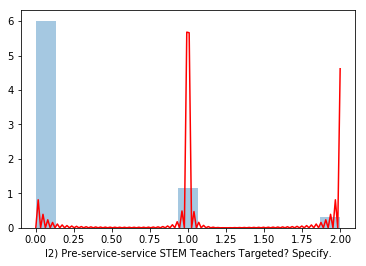

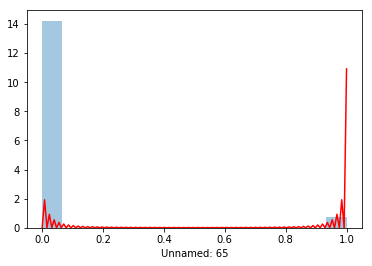

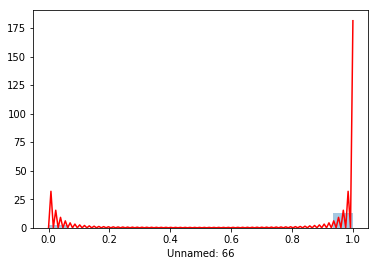

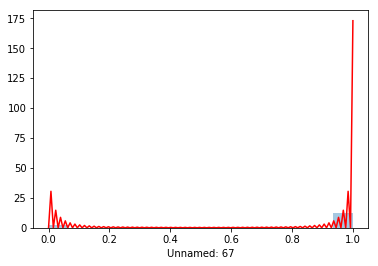

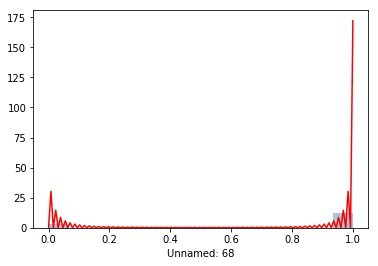

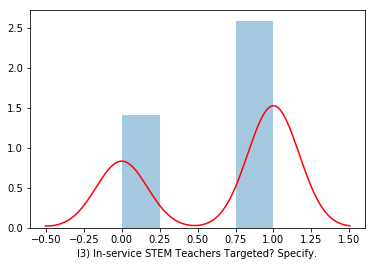

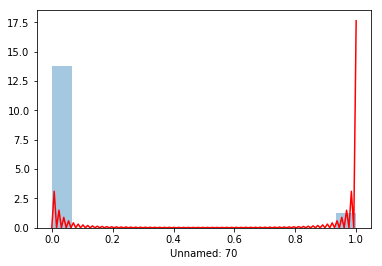

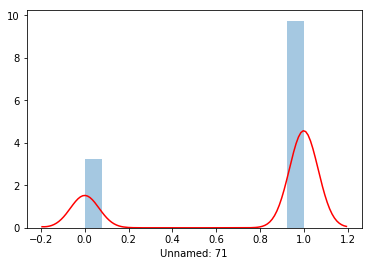

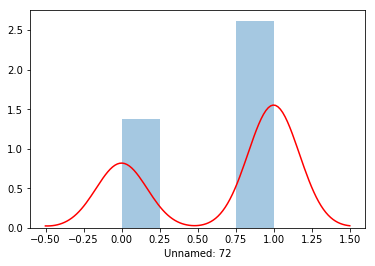

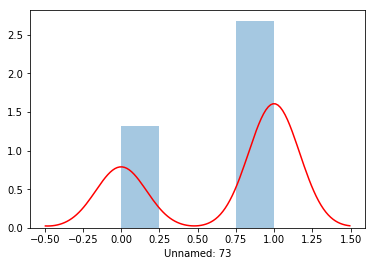

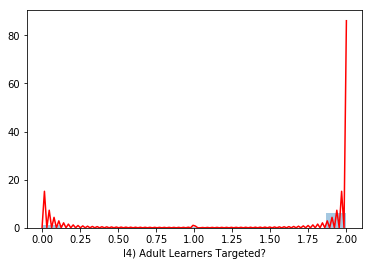

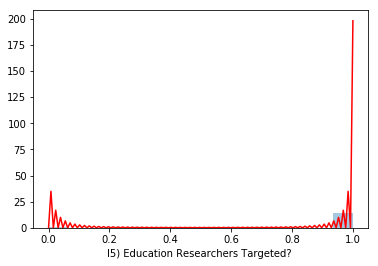

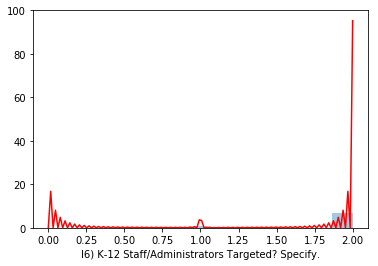

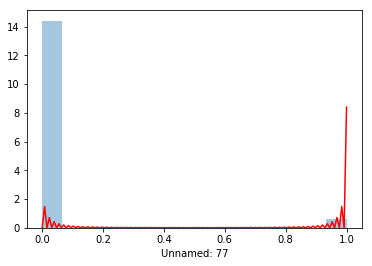

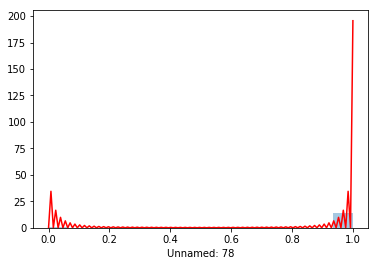

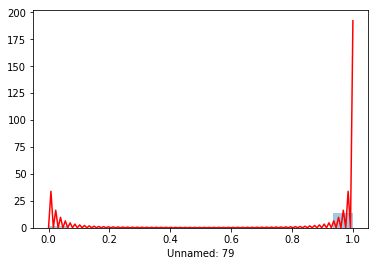

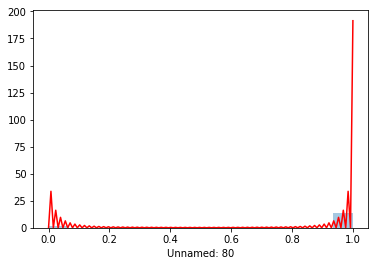

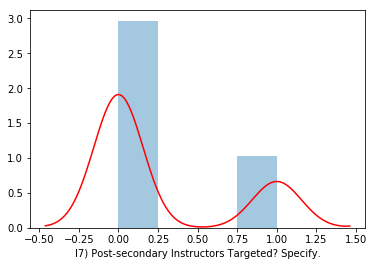

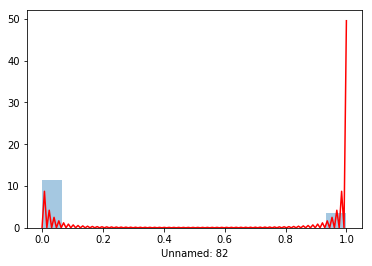

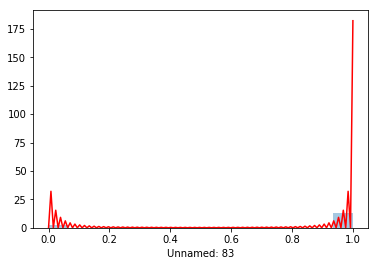

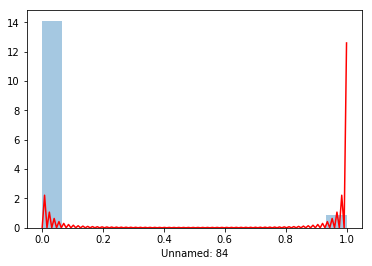

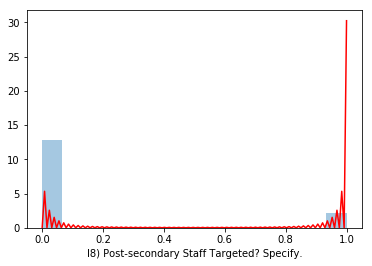

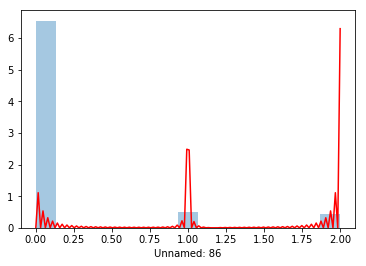

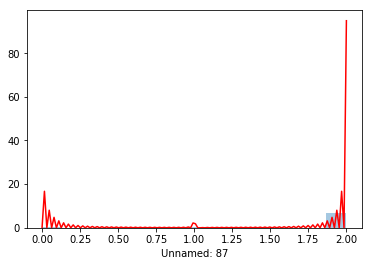

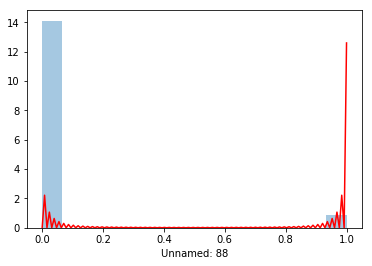

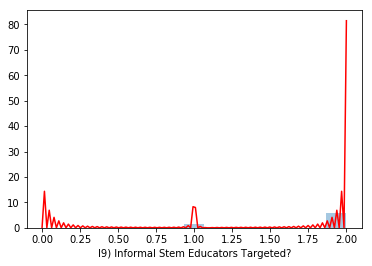

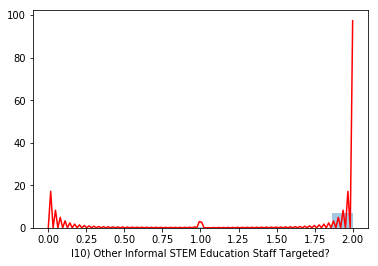

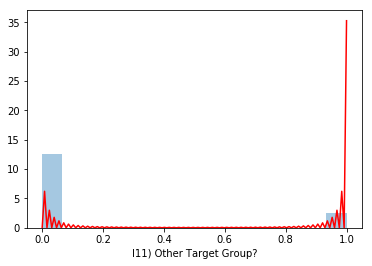

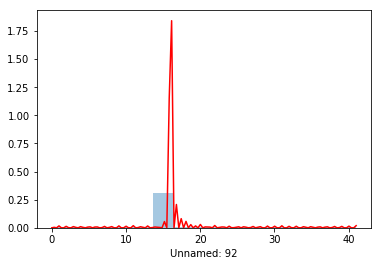

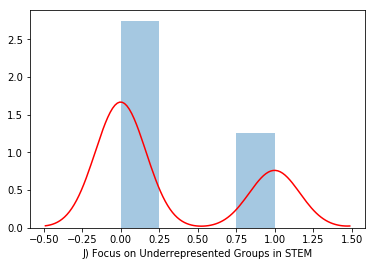

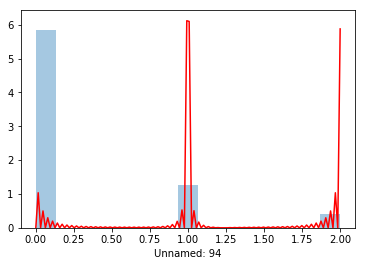

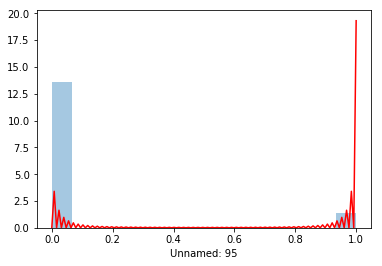

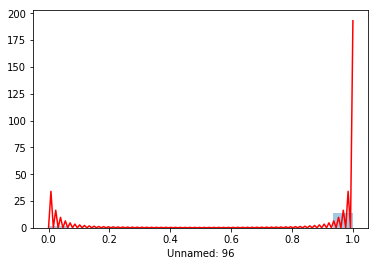

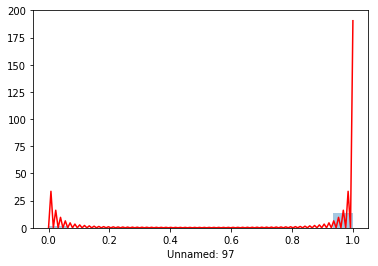

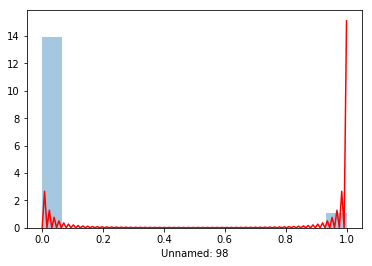

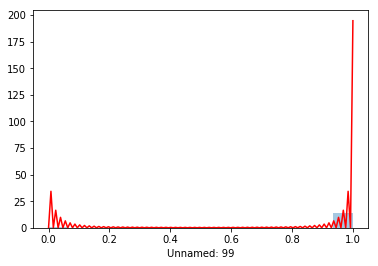

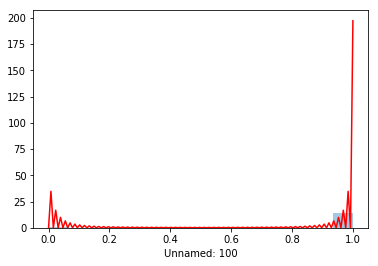

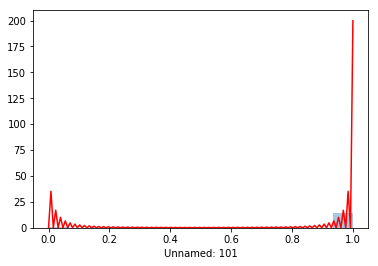

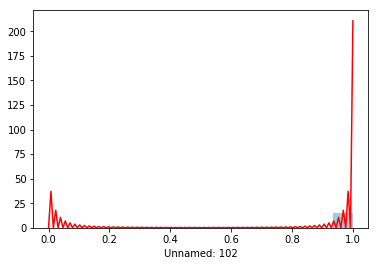

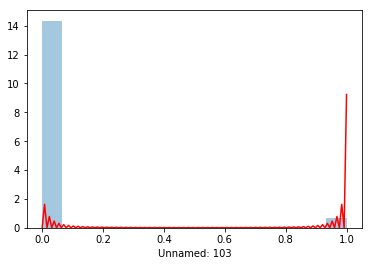

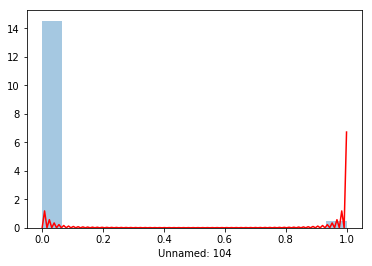

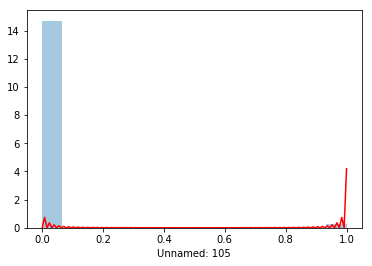

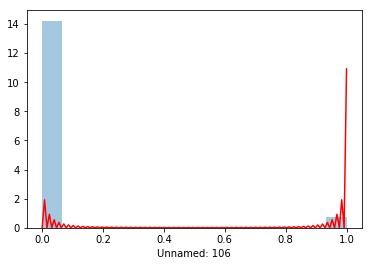

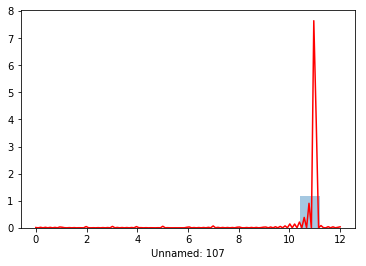

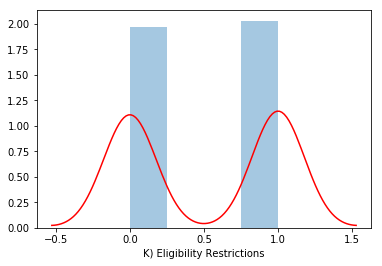

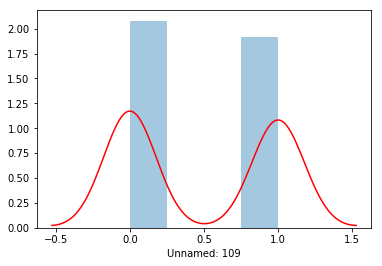

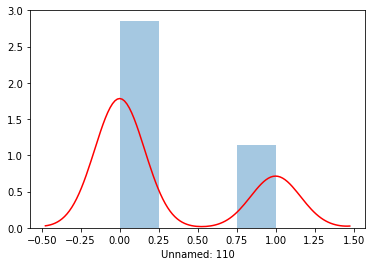

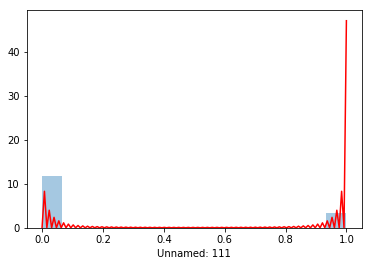

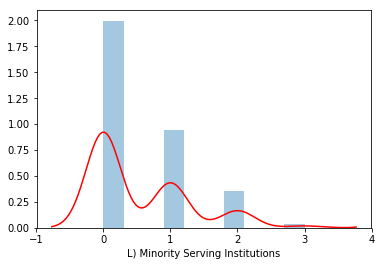

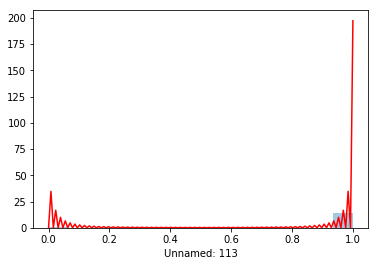

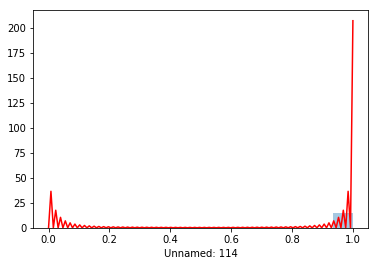

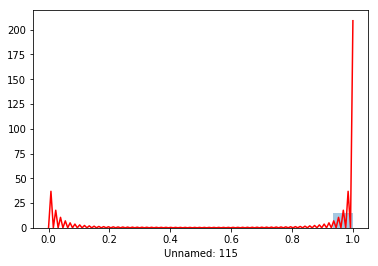

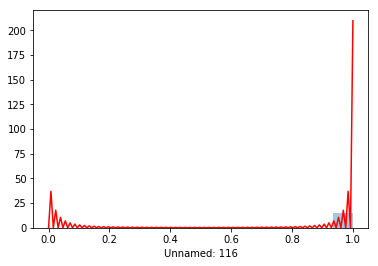

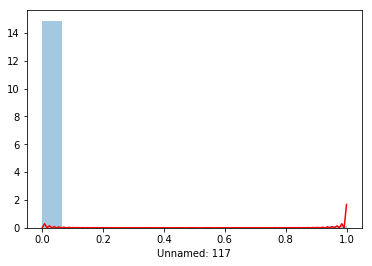

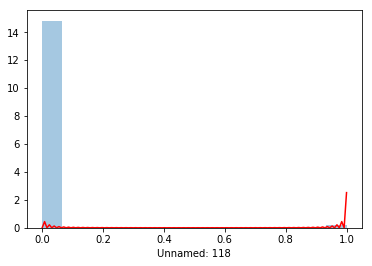

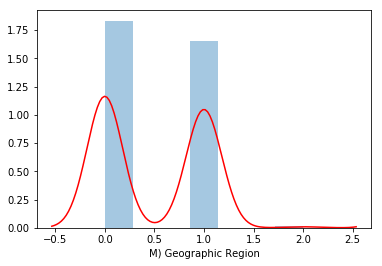

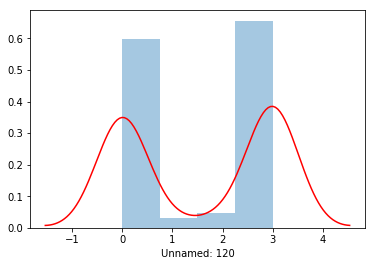

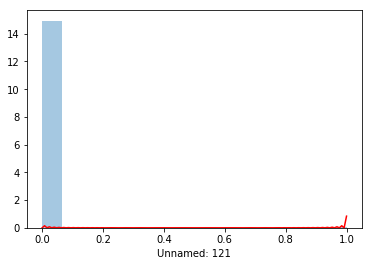

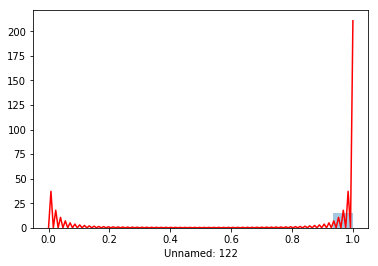

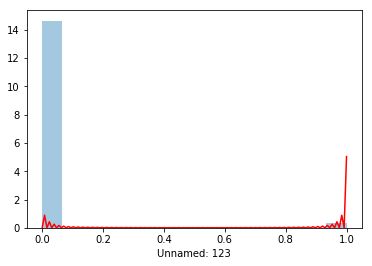

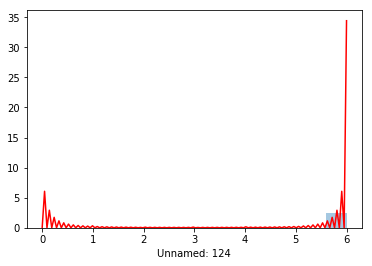

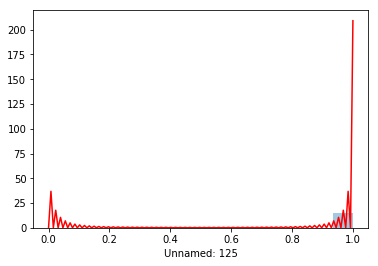

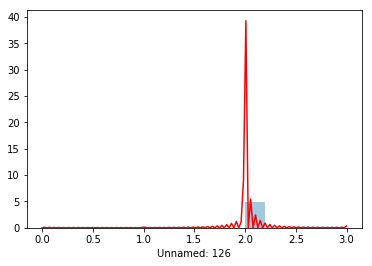

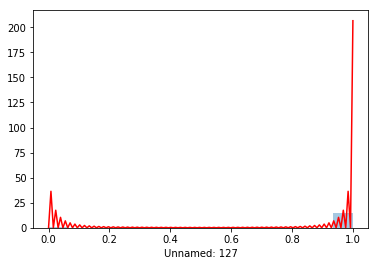

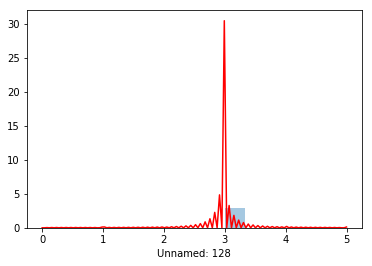

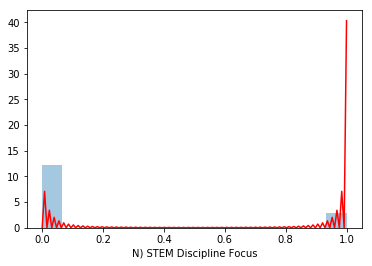

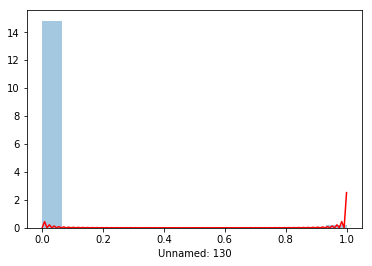

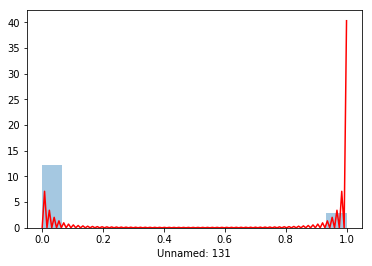

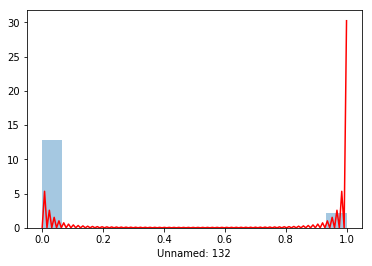

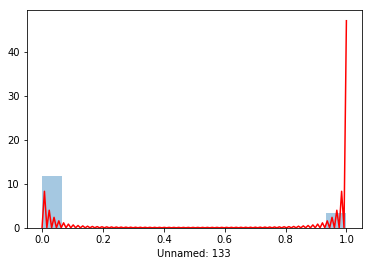

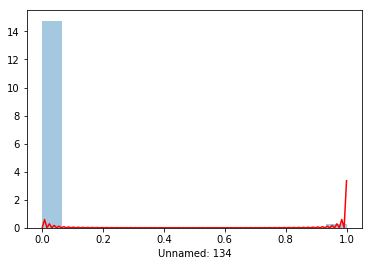

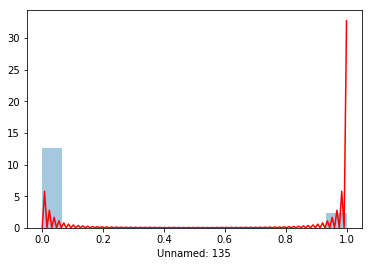

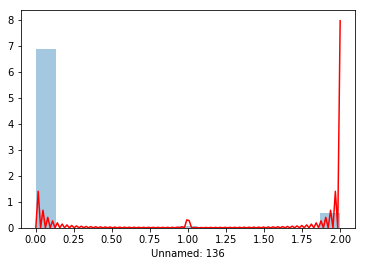

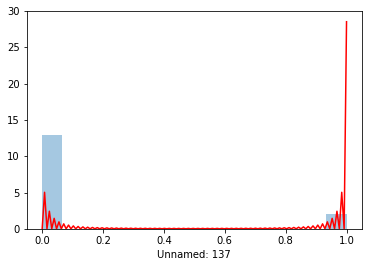

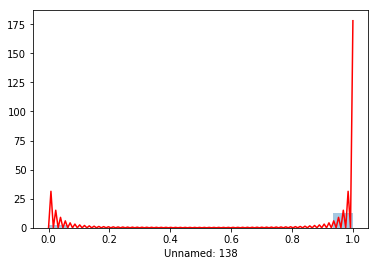

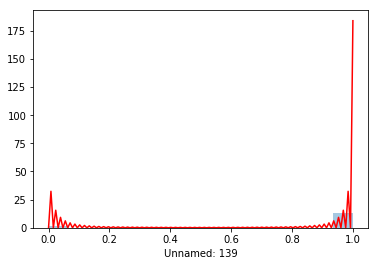

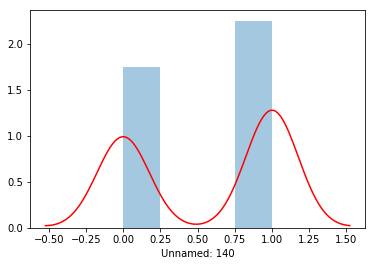

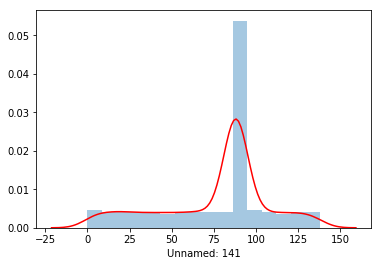

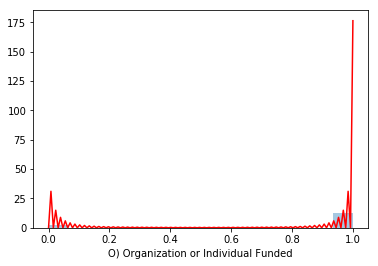

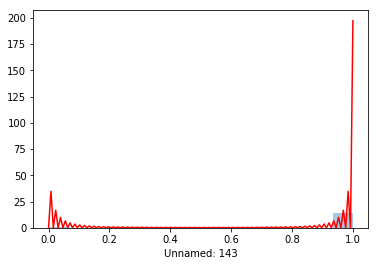

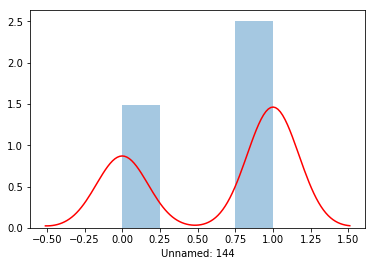

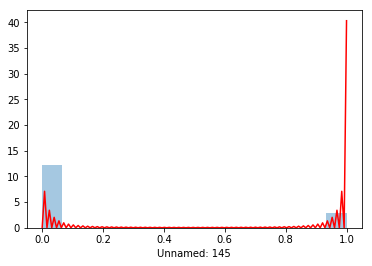

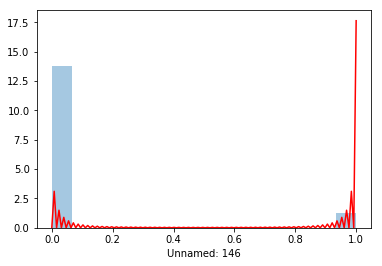

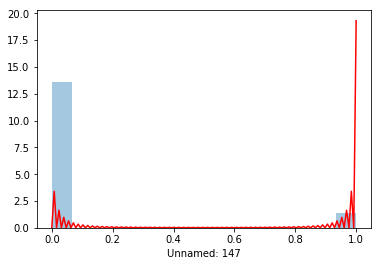

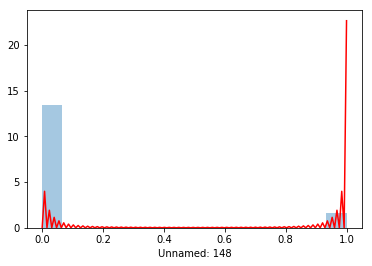

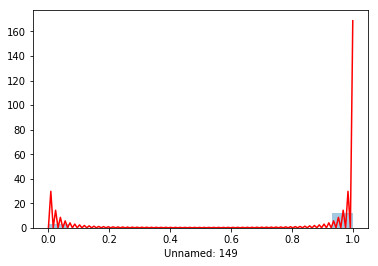

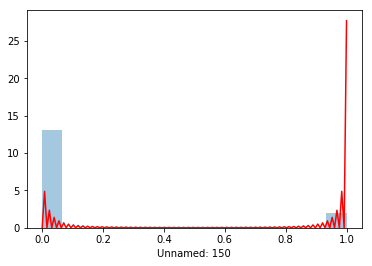

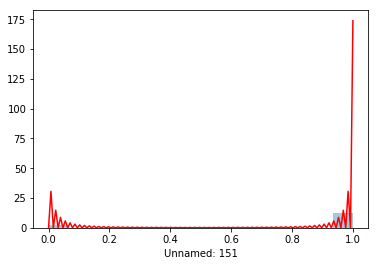

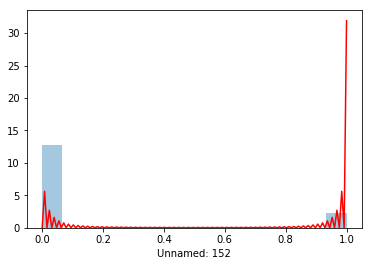

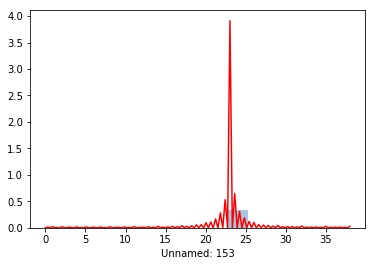

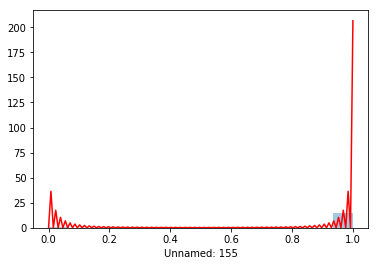

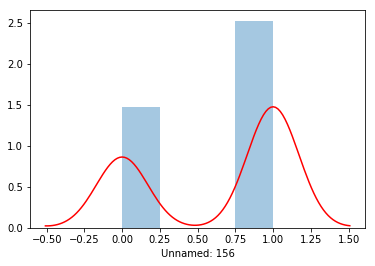

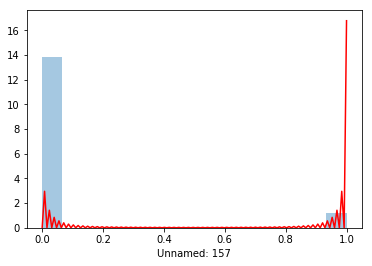

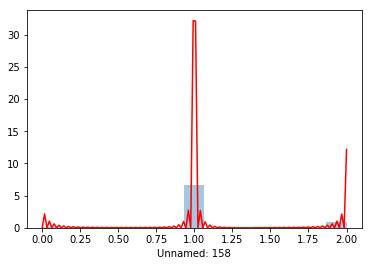

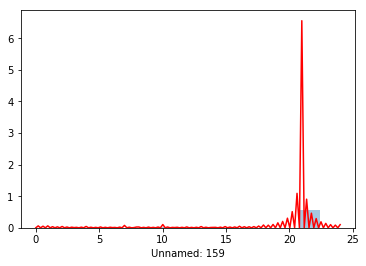

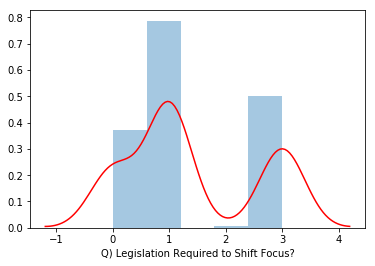

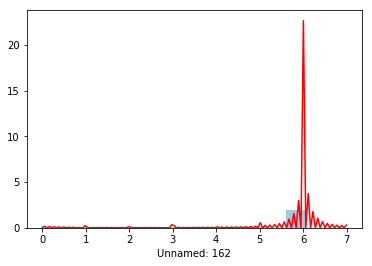

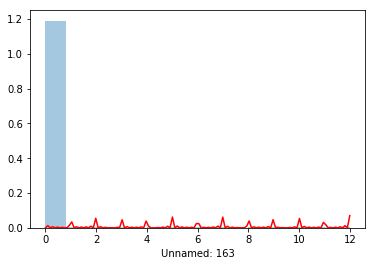

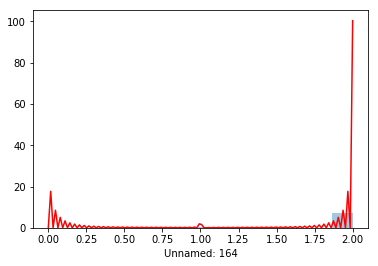

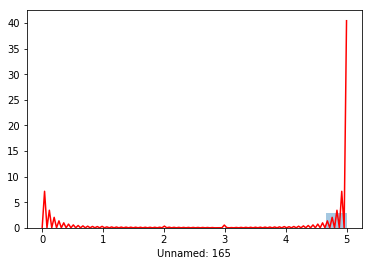

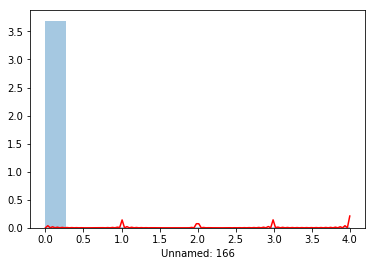

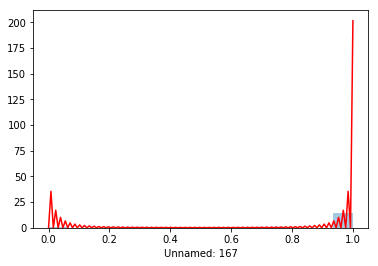

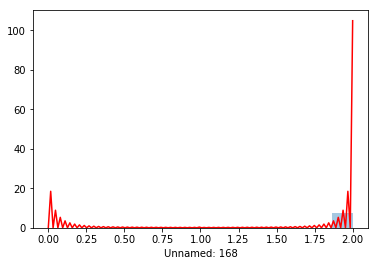

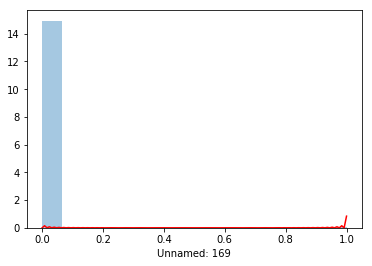

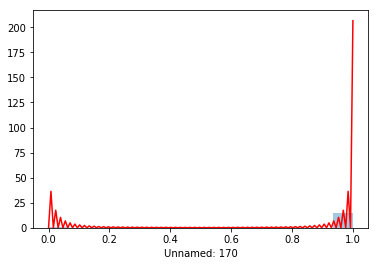

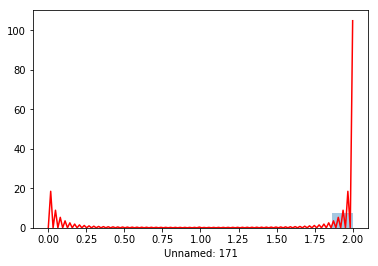

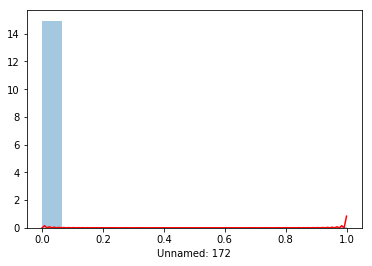

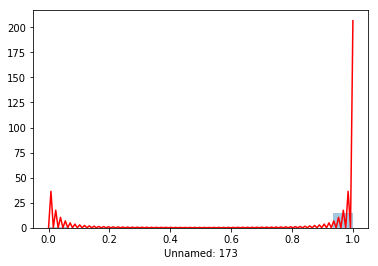

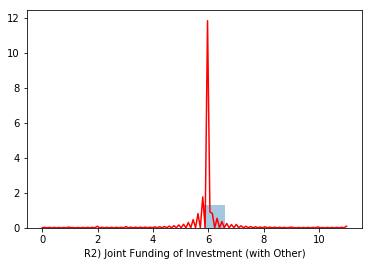

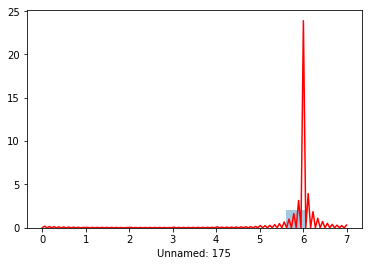

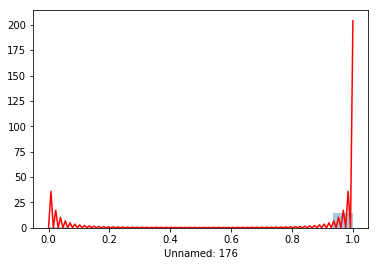

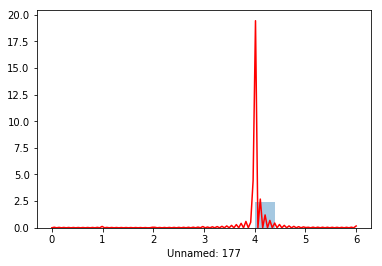

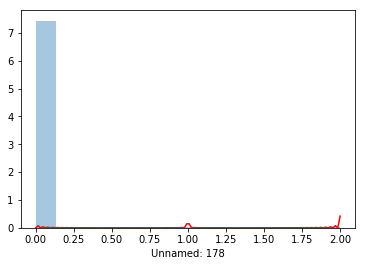

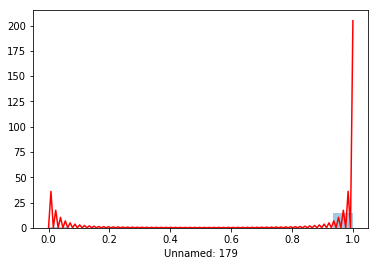

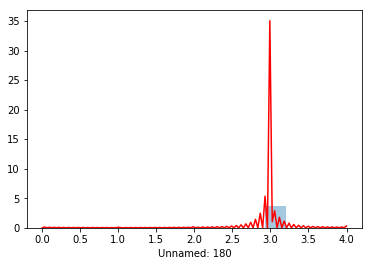

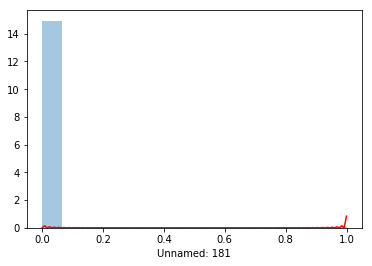

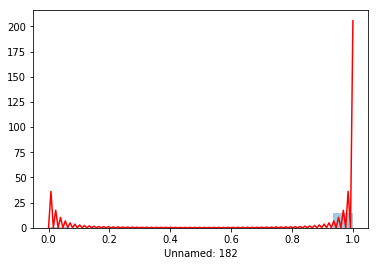

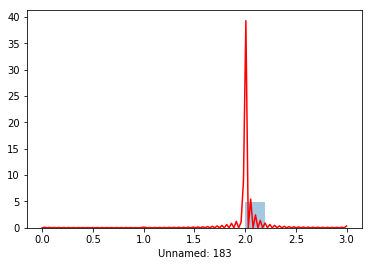

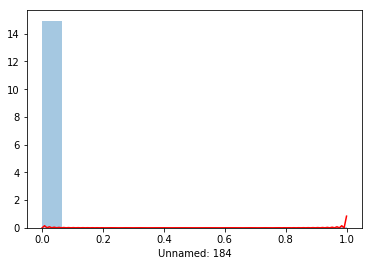

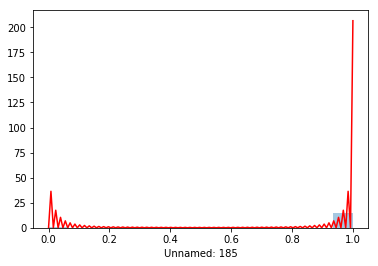

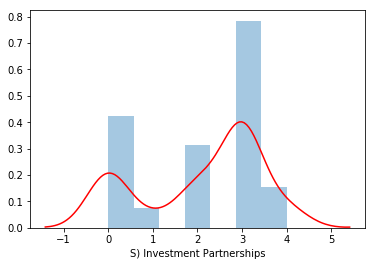

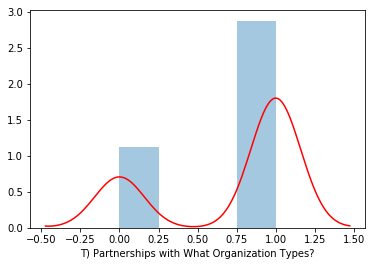

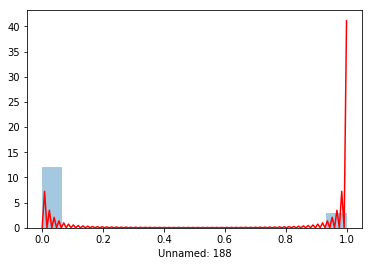

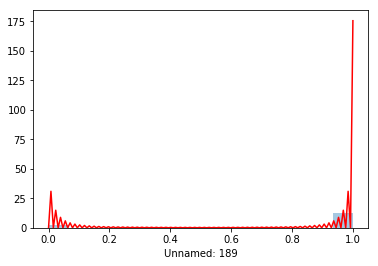

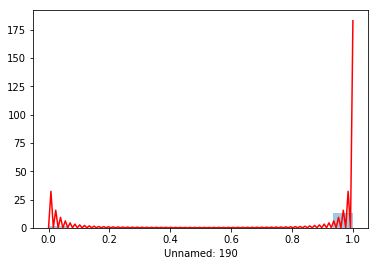

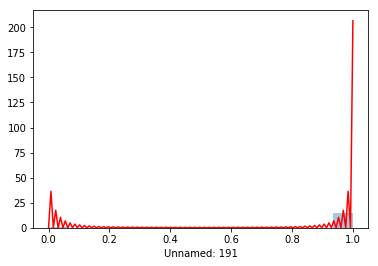

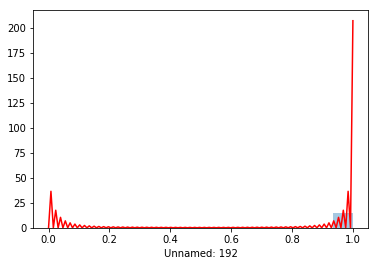

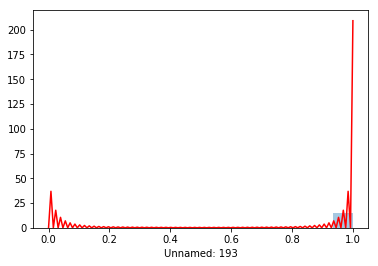

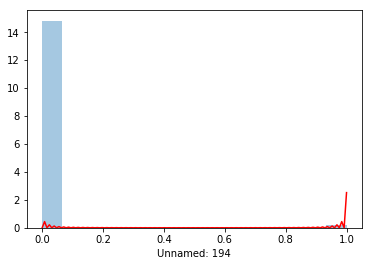

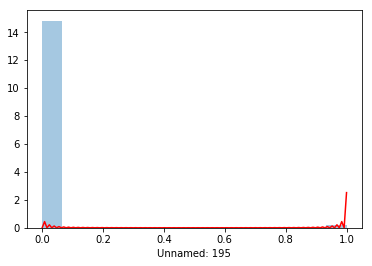

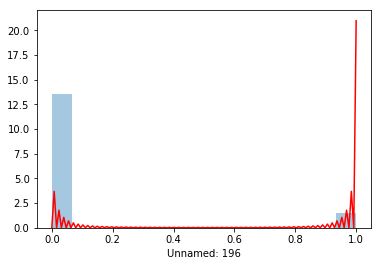

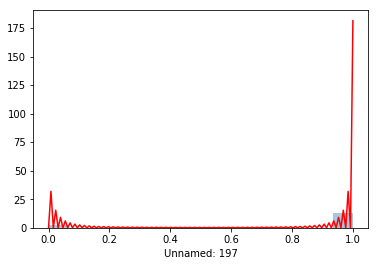

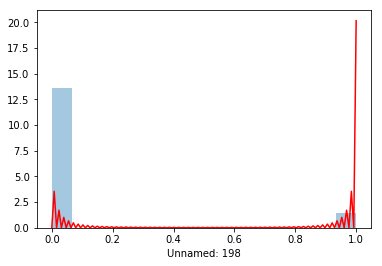

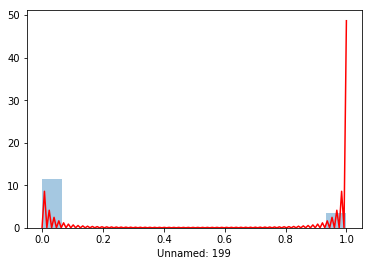

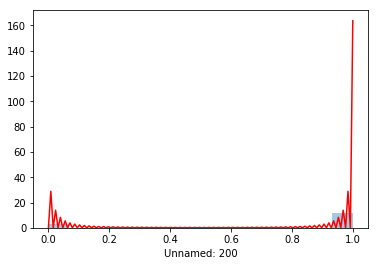

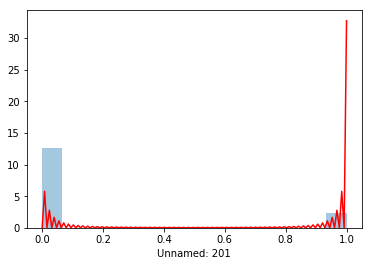

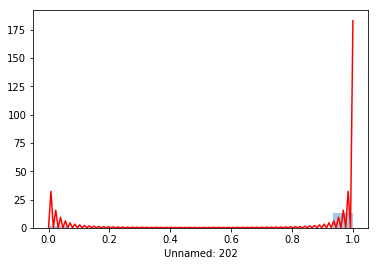

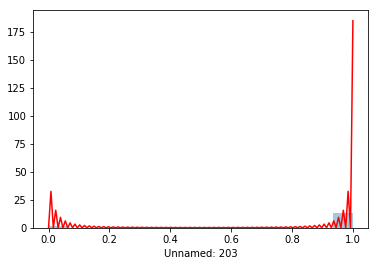

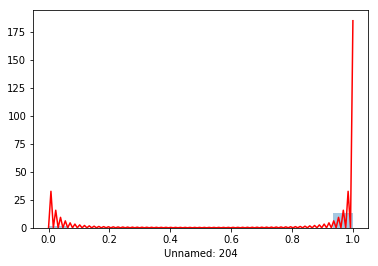

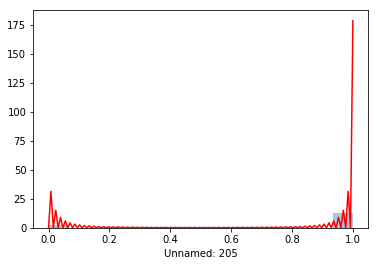

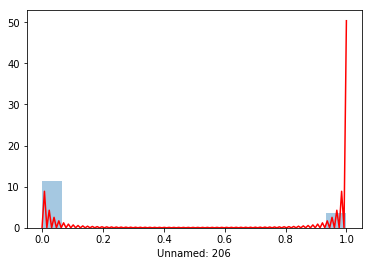

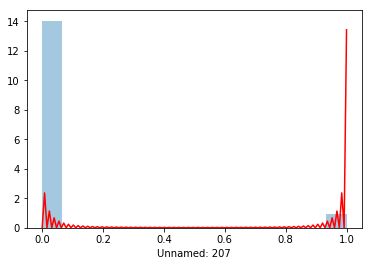

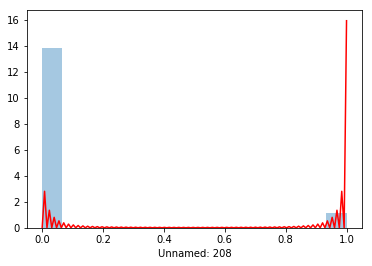

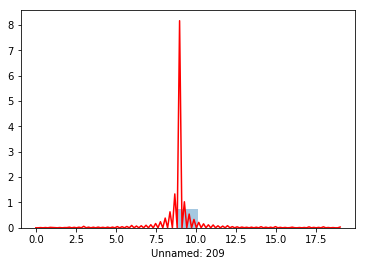

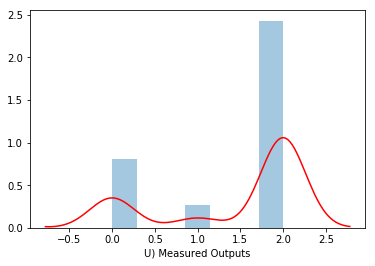

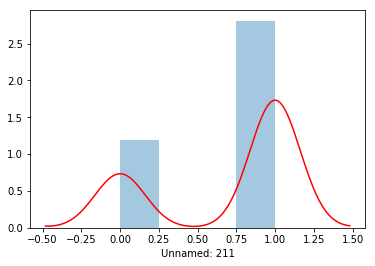

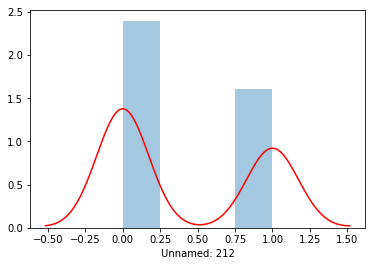

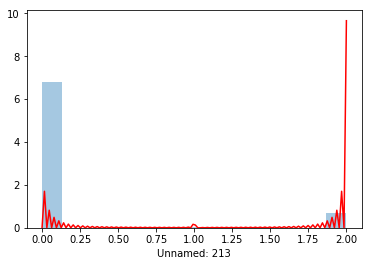

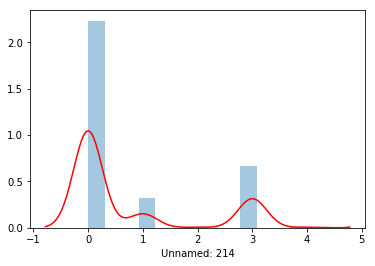

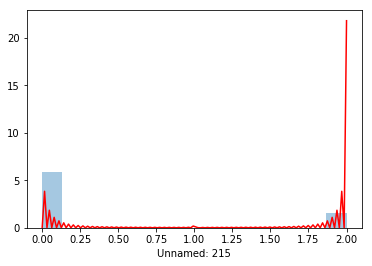

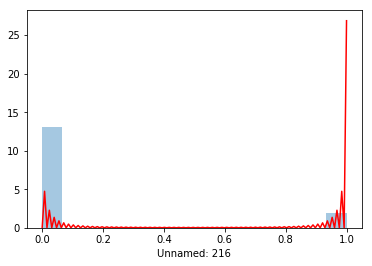

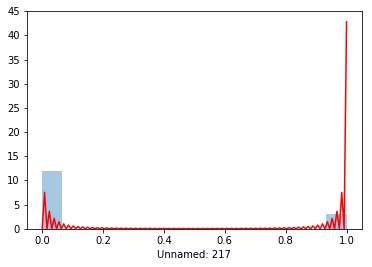

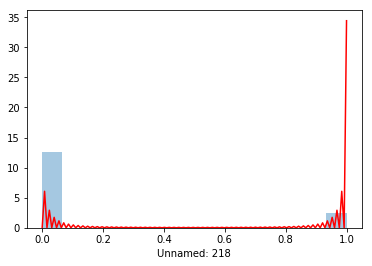

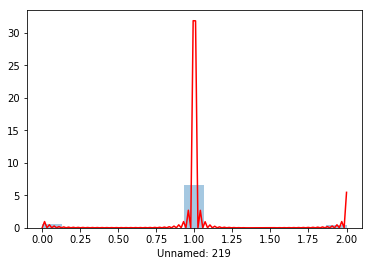

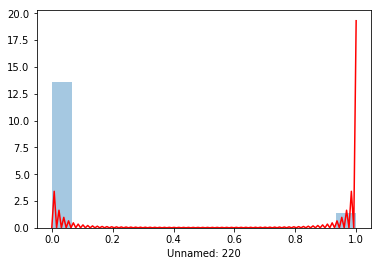

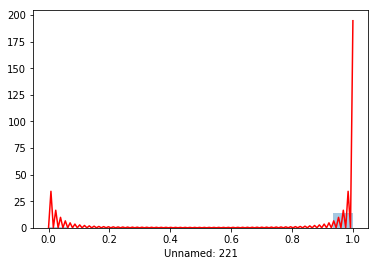

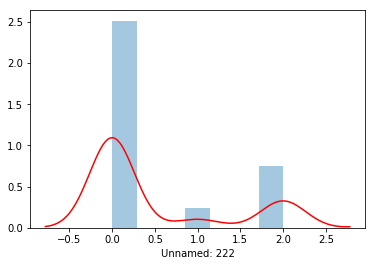

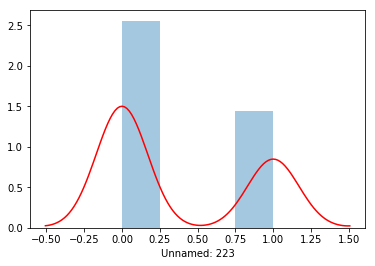

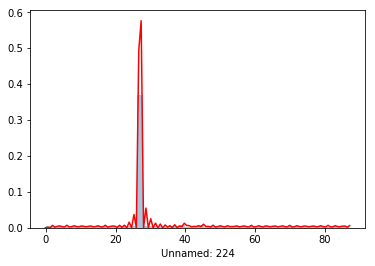

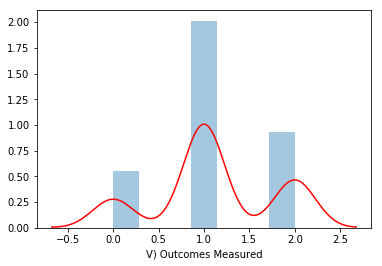

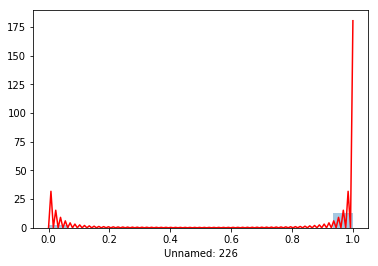

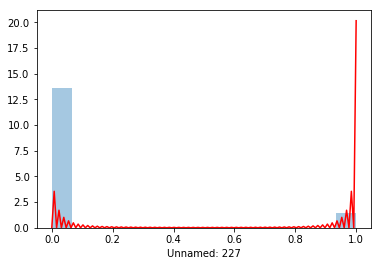

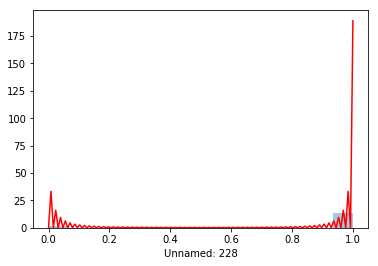

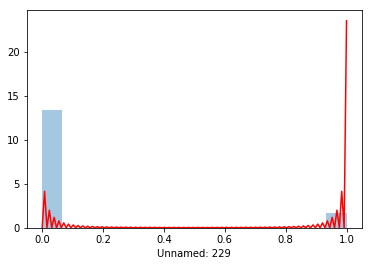

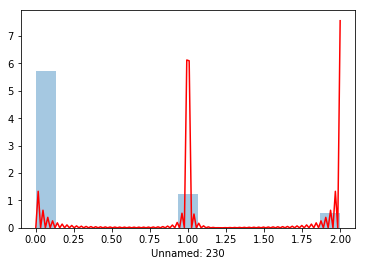

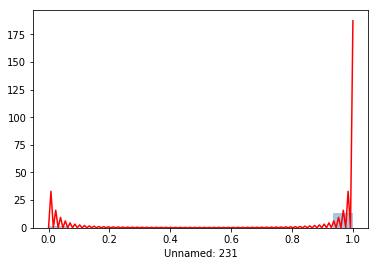

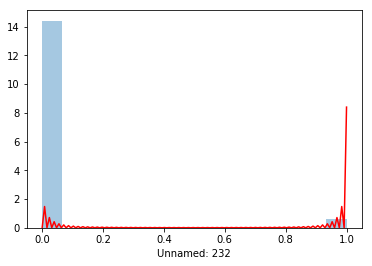

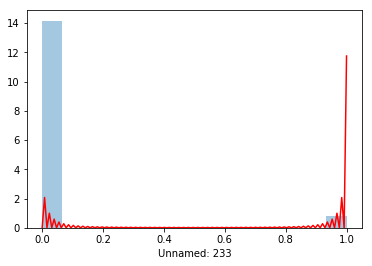

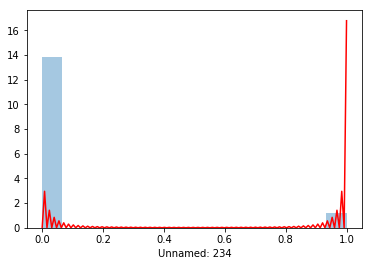

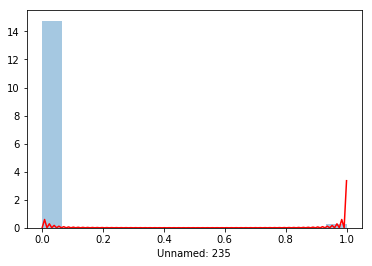

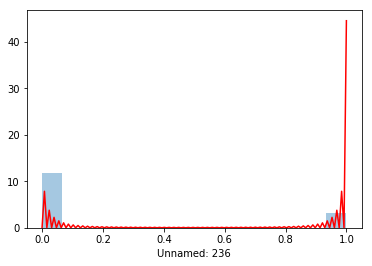

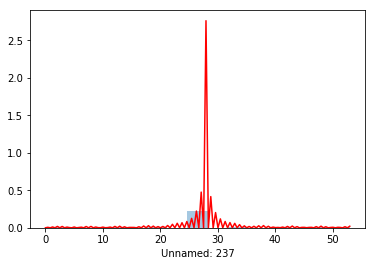

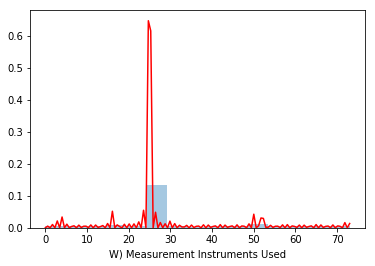

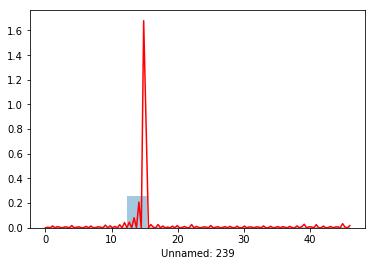

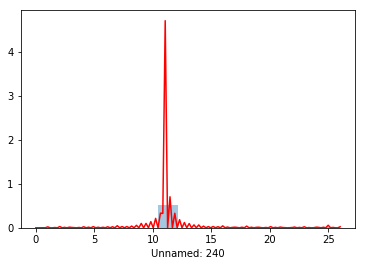

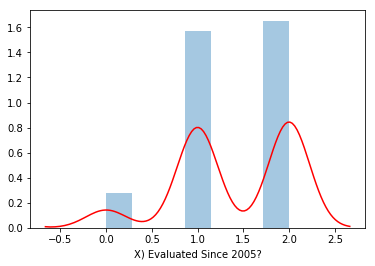

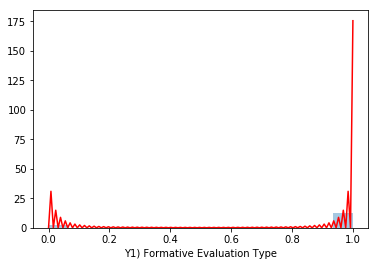

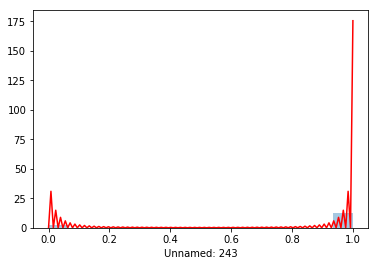

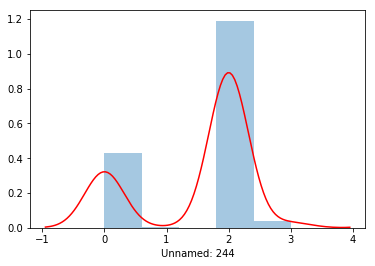

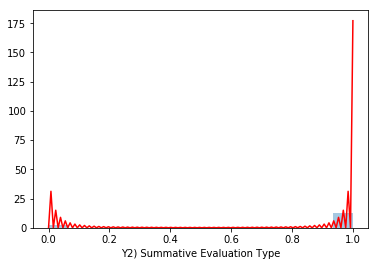

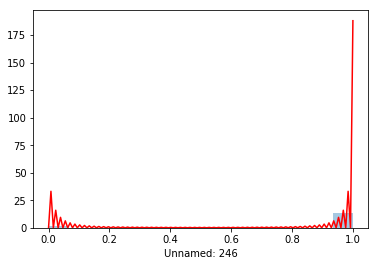

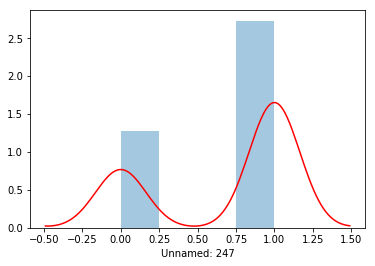

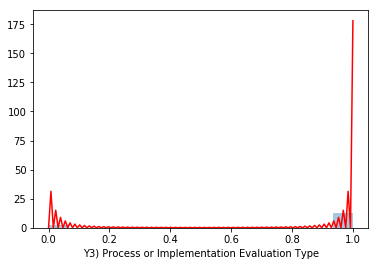

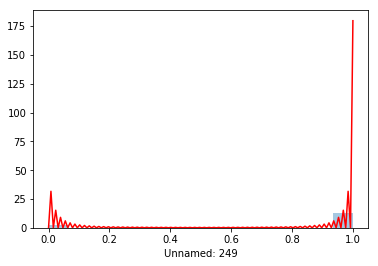

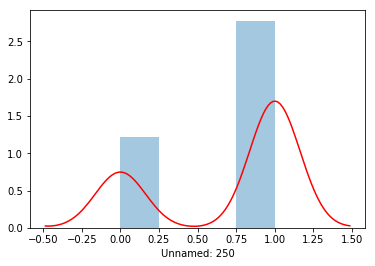

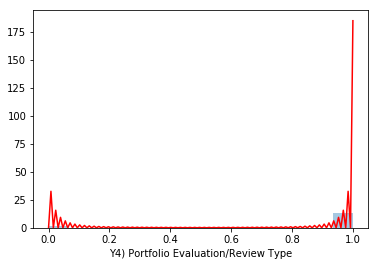

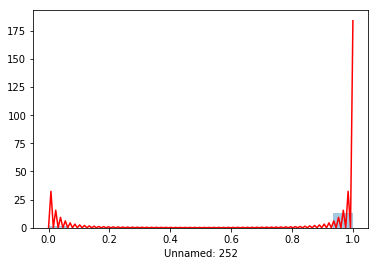

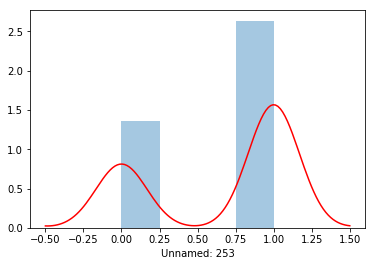

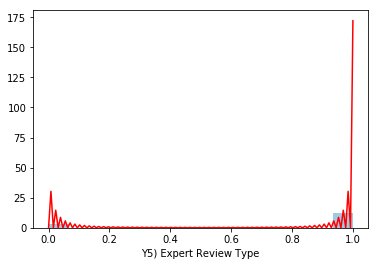

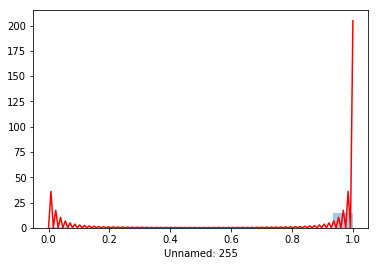

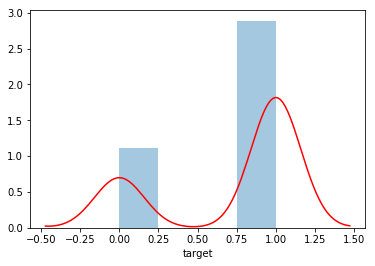

In [74]:
## preprocessed univariate distribution
show_uni_plots(funding_var, dataset, processed=1)

In [75]:
#### STAGE 2 TASK 2
from sklearn.metrics import mutual_info_score
## target vs all non-funding var
def get_mutual_info_score(target,col):
    return mutual_info_score(target,col)

In [76]:
labels = dataset.target.values
features = dataset.drop(['target'], axis=1)
mutual_info_df = pd.DataFrame(columns=['Column', 'Mutual Info Score'])
for x in features.columns:
    if x not in funding_var:
        #print(x," \t- ", get_mutual_info_score(labels,dataset[x]))
        mutual_info_df = mutual_info_df.append({'Column':x,'Mutual Info Score':get_mutual_info_score(labels,dataset[x])},ignore_index=True)

In [77]:
mutual_info_df

Column  Mutual Info Score
0                                  Investment Name           0.590842
1                                           Agency           0.069868
2                                        Subagency           0.210709
3                             A) Brief Description           0.590842
4                              B) Year Established           0.071156
5             D) Mission-specific or General STEM?           0.001832
6    E) Agency or Mission-Related Workforce Needs?           0.010570
7                 F1) Primary Investment Objective           0.016431
8              F2) Secondary Investment Objectives           0.001474
9                                      Unnamed: 13           0.004211
10                                     Unnamed: 14           0.001112
11                                     Unnamed: 15           0.000237
12                                     Unnamed: 16           0.002720
13                                     Unnamed: 17           0.007406
14                                     Unnamed: 18           0.005627
15                                     Unnamed: 19           0.000229
16                                     Unnamed: 20           0.000326
17                                     Unnamed: 21           0.080660
18                 G1) Primary Research Approaches           0.000009
19                                     Unnamed: 23           0.000617
20                                     Unnamed: 24           0.002960
21                                     Unnamed: 25           0.000305
22                                     Unnamed: 26           0.010660
23               G2) Secondary Research Approaches           0.005704
24                                     Unnamed: 28           0.005720
25                                     Unnamed: 29           0.000066
26                                     Unnamed: 30           0.000842
27                                     Unnamed: 31           0.000236
28                G3) Research Approaches Not Used           0.000170
29                                     Unnamed: 33           0.000191
..                                             ...                ...
220                                   Unnamed: 226           0.000523
221                                   Unnamed: 227           0.000206
222                                   Unnamed: 228           0.002759
223                                   Unnamed: 229           0.003885
224                                   Unnamed: 230           0.000990
225                                   Unnamed: 231           0.000440
226                                   Unnamed: 232           0.003934
227                                   Unnamed: 233           0.003026
228                                   Unnamed: 234           0.003004
229                                   Unnamed: 235           0.000032
230                                   Unnamed: 236           0.001200
231                                   Unnamed: 237           0.133161
232                W) Measurement Instruments Used           0.196061
233                                   Unnamed: 239           0.097966
234                                   Unnamed: 240           0.054098
235                       X) Evaluated Since 2005?           0.007522
236                  Y1) Formative Evaluation Type           0.000305
237                                   Unnamed: 243           0.016669
238                                   Unnamed: 244           0.002159
239                  Y2) Summative Evaluation Type           0.000107
240                                   Unnamed: 246           0.000245
241                                   Unnamed: 247           0.001380
242  Y3) Process or Implementation Evaluation Type           0.009536
243                                   Unnamed: 249           0.003472
244                                   Unnamed: 250           0.000028
245           Y4) Portfolio Evaluation/Review Type    

In [78]:
features.shape

(252, 253)

In [79]:
##### must step need to one hot encode features
categorical_col = [x for x in features.columns if features[x].dtype=='O']
categorical_col = [x for x in categorical_col[1:] if x!='A) Brief Description']
## categorical_col
## all features except Investment Name
features = pd.get_dummies(features, columns=categorical_col, drop_first=True)
features.head(1)

Investment Name  \
0  Centers for Ocean Sciences Education Excellence ~   

                                A) Brief Description  B) Year Established  \
0  The Division of Ocean Sciences seeks to establ...               2002.0   

   C1) Funding FY2008  C2) Funding FY2009  C3) Funding FY2010  Unnamed: 163  \
0                5.24                7.19                 5.7           0.0   

   Unnamed: 166  Unnamed: 169  Unnamed: 172        ...         \
0           0.0           0.0           0.0        ...          

   Unnamed: 246_NOT  Unnamed: 247_NOT  \
0                 1                 1   

   Y3) Process or Implementation Evaluation Type_NOT  Unnamed: 249_NOT  \
0                                                  1                 1   

   Unnamed: 250_NOT  Y4) Portfolio Evaluation/Review Type_NOT  \
0                 0                                         0   

   Unnamed: 252_NOT  Unnamed: 253_NOT  Y5) Expert Review Type_NOT  \
0                 1                 1                           0   

   Unnamed: 255_NOT  
0                 1  

[1 rows x 1039 columns]

In [80]:
### checking if adding a feature growth percentage can impact 
def add_growth_per(df):
    df['growth_percentage'] = ((df['C2) Funding FY2009']-df['C1) Funding FY2008'])*100/df['C1) Funding FY2008'])
    return df

In [81]:
add_growth_per(features)['growth_percentage'].head()
features.shape

(252, 1040)

In [82]:
#### STAGE 3 TASK 1 - split by 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3,random_state=26, shuffle=True)

In [83]:
#### STAGE 3 TASK 2 - xgboost model
from xgboost import XGBClassifier
model = XGBClassifier(seed=26)
train_col = [x for x in features if x!='Investment Name' and x!='A) Brief Description']
val = X_train[train_col].values
model.fit(val, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=26, silent=True,
       subsample=1)

In [85]:
from sklearn.metrics import roc_auc_score
check = X_test[train_col].values
pred = model.predict(check)
roc_auc_score(pred,y_test)

1.0

In [88]:
roc_auc_score(pred,y_test)

1.0

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test[train_col].values),y_test)

1.0

In [ ]:
### before adding percentage growth it is 0.92 now it is 1
### what if for sample data
sample_labels = sample_data.target
sample_labels.shape

In [ ]:
sample_features = sample_data.drop(['target'],axis=1)

In [ ]:
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_features, sample_labels, test_size=0.3, random_state=26, shuffle=True)

In [ ]:
sampleModel = XGBClassifier(seed=26)
sample_train_col = [x for x in sample_features.columns if x!='Investment Name' and x!='Brief Description']
sampleModel.fit(sample_X_train[sample_train_col], sample_y_train)

In [ ]:
roc_auc_score(sampleModel.predict(sample_X_test[sample_train_col]),sample_y_test)

In [ ]:
### it's not waste of time understanding and processing other features

In [87]:
for x in features.columns:
    print(x)

Investment Name
A) Brief Description
B) Year Established
C1) Funding FY2008
C2) Funding FY2009
C3) Funding FY2010
Unnamed: 163
Unnamed: 166
Unnamed: 169
Unnamed: 172
Unnamed: 178
Unnamed: 181
Unnamed: 184
Agency_Commerce
Agency_Defense
Agency_Education
Agency_Energy
Agency_Environmental Protection Agency
Agency_Health & Human Services
Agency_Homeland Security
Agency_Interior
Agency_NASA
Agency_National Science Foundation
Agency_Nuclear Regulatory Commission
Agency_Transportation
Subagency_ARMD
Subagency_Center GRC
Subagency_Center GSFC
Subagency_Center JPL
Subagency_Center JSC
Subagency_Center LaRC
Subagency_Center MSFC
Subagency_Directorate for Biological Sciences (BIO)
Subagency_Directorate for Computer & Information Science & Engineering (CISE)
Subagency_Directorate for Education and Human Resources (EHR)
Subagency_Directorate for Engineering (ENG)
Subagency_Directorate for Geosciences (GEO)
Subagency_Directorate for Math and Physical Sciences (MPS)
Subagency_ESMD
Subagency_Educatio